In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv


In [2]:
dados = pd.read_csv('/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv')
dados.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Company (Maker-if known) = Name of the company manufacturing the bar

Specific Bean Origin\nor Bar Name = The specific geo-region of origin for the bar

REF = A value linked to when the review was entered in the database. Higher = more recent

Review Date = Date of publication of the review

Cocoa Percent = Cocoa percentage (darkness) of the chocolate bar being reviewed

Company Location = Manufacturer base country

Rating = Expert rating for the bar

Bean Type = The variety (breed) of bean used, if provided

Broad Bean Origin = The broad geo-region of origin for the bean

In [3]:
dados.columns = ['Fabricante', 'Produto', 'REF', 'Data_nota', 'Porcentagem_cacau', 'Local_empresa', 'Nota', 'Tipo_grao', 'Origem_grao']
dados.head()

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
dados.shape

(1795, 9)

# Como estão as notas:

In [5]:
dados.Nota.unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

In [6]:
dados.Nota.value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Nota, dtype: int64

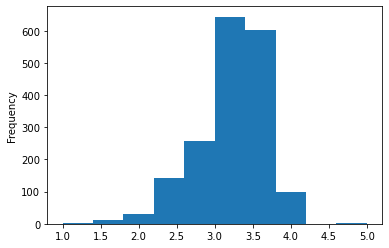

In [7]:
dados.Nota.plot(kind = 'hist');

In [8]:
dados.Nota.median()

3.25

In [9]:
dados.Nota.describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Nota, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


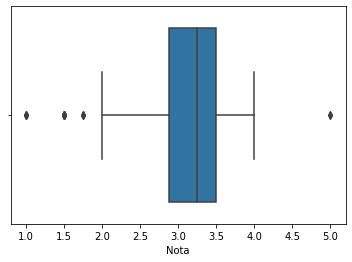

In [10]:
sns.boxplot(dados.Nota);

# Como estão as variáveis:

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabricante         1795 non-null   object 
 1   Produto            1795 non-null   object 
 2   REF                1795 non-null   int64  
 3   Data_nota          1795 non-null   int64  
 4   Porcentagem_cacau  1795 non-null   object 
 5   Local_empresa      1795 non-null   object 
 6   Nota               1795 non-null   float64
 7   Tipo_grao          1794 non-null   object 
 8   Origem_grao        1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


# Fabricantes com melhores notas:

In [12]:
dados.Fabricante.unique()

array(['A. Morin', 'Acalli', 'Adi', 'Aequare (Gianduja)', 'Ah Cacao',
       "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'AMMA', 'Anahata', 'Animas',
       'Ara', 'Arete', 'Artisan du Chocolat',
       'Artisan du Chocolat (Casa Luker)', 'Askinosie', 'Bahen & Co.',
       'Bakau', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Beau Cacao',
       'Beehive', 'Belcolade', 'Bellflower', 'Belyzium', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao de Origen',
       'Cacao de Origin', 'Cacao Hunters', 'Cacao M

In [13]:
dados.Fabricante.value_counts()

Soma                 47
Bonnat               27
Fresco               26
Pralus               25
A. Morin             23
                     ..
Chocablog             1
Marigold's Finest     1
Chloe Chocolat        1
Chequessett           1
Ki' Xocolatl          1
Name: Fabricante, Length: 416, dtype: int64

In [14]:
dados.groupby('Fabricante').mean()['Nota']

Fabricante
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Nota, Length: 416, dtype: float64

In [15]:
fabricante = dados.groupby('Fabricante').mean()['Nota']
fabricante.sort_values(ascending = False).round(3)

Fabricante
Tobago Estate (Pralus)                  4.000
Heirloom Cacao Preservation (Zokoko)    3.875
Ocelot                                  3.875
Amedei                                  3.846
Matale                                  3.812
                                        ...  
Majani                                  2.000
Love Bar                                2.000
Callebaut                               1.875
Machu Picchu Trading Co.                1.875
Cote d' Or (Kraft)                      1.000
Name: Nota, Length: 416, dtype: float64

In [16]:
fabricante.sort_values(ascending = False).round(3).head(15)

Fabricante
Tobago Estate (Pralus)                  4.000
Heirloom Cacao Preservation (Zokoko)    3.875
Ocelot                                  3.875
Amedei                                  3.846
Matale                                  3.812
Patric                                  3.792
Idilio (Felchlin)                       3.775
Obolo                                   3.750
Un Dimanche A Paris                     3.750
Christopher Morel (Felchlin)            3.750
Kerchner                                3.750
Dole (Guittard)                         3.750
Chocola'te                              3.750
Acalli                                  3.750
Timo A. Meyer                           3.750
Name: Nota, dtype: float64

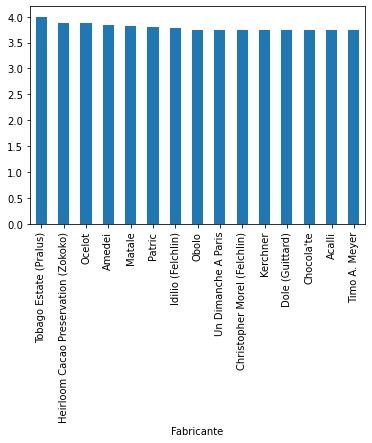

In [17]:
fabricante.sort_values(ascending = False).round(3).head(15).plot.bar();

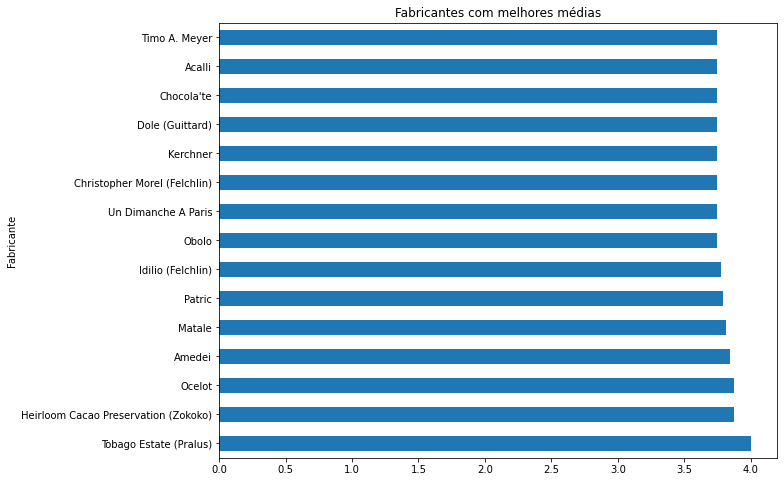

In [18]:
fabricante.sort_values(ascending = False).round(3).head(15).plot(kind = 'barh', figsize = (10, 8), 
                                                                 title = 'Fabricantes com melhores médias');

In [19]:
lista_fabricantes = fabricante.sort_values(ascending = False).round(3).head(15)
lista_fabricantes.index

Index(['Tobago Estate (Pralus)', 'Heirloom Cacao Preservation (Zokoko)',
       'Ocelot', 'Amedei', 'Matale', 'Patric', 'Idilio (Felchlin)', 'Obolo',
       'Un Dimanche A Paris', 'Christopher Morel (Felchlin)', 'Kerchner',
       'Dole (Guittard)', 'Chocola'te', 'Acalli', 'Timo A. Meyer'],
      dtype='object', name='Fabricante')

In [20]:
top_15_fabricante = list(lista_fabricantes.index)

In [21]:
dados.query('Fabricante in @top_15_fabricante')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
23,Acalli,"Chulucanas, El Platanal",1462,2015,70%,U.S.A.,3.75,,Peru
24,Acalli,"Tumbes, Norandino",1470,2015,70%,U.S.A.,3.75,Criollo,Peru
75,Amedei,"Piura, Blanco de Criollo",979,2012,70%,Italy,3.75,,Peru
76,Amedei,Porcelana,111,2007,70%,Italy,4.00,Criollo (Porcelana),Venezuela
77,Amedei,Nine,111,2007,75%,Italy,4.00,Blend,
78,Amedei,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
79,Amedei,Ecuador,123,2007,70%,Italy,3.00,Trinitario,Ecuador
80,Amedei,Jamaica,123,2007,70%,Italy,3.00,Trinitario,Jamaica
81,Amedei,Grenada,123,2007,70%,Italy,3.50,Trinitario,Grenada
82,Amedei,Venezuela,123,2007,70%,Italy,3.75,Trinitario (85% Criollo),Venezuela


In [22]:
fabricantes_melhores_notas = dados.query('Fabricante in @top_15_fabricante')

In [23]:
fabricantes_melhores_notas.shape

(49, 9)

### País de origem das empresas:

In [24]:
fabricantes_melhores_notas.groupby('Local_empresa')['Fabricante'].nunique().sort_values(ascending = False)

Local_empresa
U.S.A.         6
France         2
Australia      1
Canada         1
Chile          1
Germany        1
Italy          1
Scotland       1
Switzerland    1
Name: Fabricante, dtype: int64

In [25]:
fabricantes_melhores_notas.query('Local_empresa == "U.S.A."')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
23,Acalli,"Chulucanas, El Platanal",1462,2015,70%,U.S.A.,3.75,,Peru
24,Acalli,"Tumbes, Norandino",1470,2015,70%,U.S.A.,3.75,Criollo,Peru
390,Chocola'te,Madagascar,647,2011,70%,U.S.A.,3.75,Trinitario,Madagascar
391,Chocola'te,Venezuela,647,2011,68%,U.S.A.,3.75,,Venezuela
552,Dole (Guittard),"O'ahu, N. Shore, Waialua Estate",311,2009,70%,U.S.A.,3.75,,Hawaii
798,Heirloom Cacao Preservation (Zokoko),"Alto Beni, Upper Rio Beni, 2015",1744,2016,68%,U.S.A.,3.75,"Amazon, ICS",Bolivia
799,Heirloom Cacao Preservation (Zokoko),"Wild Beni, Lower Rio Beni, Tranquilidad, 2015",1744,2016,72%,U.S.A.,4.00,Beniano,Bolivia
899,Kerchner,"La Red, Project Reserva, Guaconejo",1133,2013,70%,U.S.A.,3.75,,Dominican Republic
1272,Patric,Signature Blend,636,2011,70%,U.S.A.,3.75,Blend,
1273,Patric,Madagascar,331,2009,75%,U.S.A.,4.00,Trinitario,Madagascar


### Porcentagem de cacau mais utilizada:

In [26]:
fabricantes_melhores_notas.Porcentagem_cacau.value_counts()

70%    24
72%    11
68%     4
75%     3
63%     2
74%     2
67%     2
66%     1
Name: Porcentagem_cacau, dtype: int64

In [27]:
fabricantes_melhores_notas.query('Porcentagem_cacau == "70%"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
23,Acalli,"Chulucanas, El Platanal",1462,2015,70%,U.S.A.,3.75,,Peru
24,Acalli,"Tumbes, Norandino",1470,2015,70%,U.S.A.,3.75,Criollo,Peru
75,Amedei,"Piura, Blanco de Criollo",979,2012,70%,Italy,3.75,,Peru
76,Amedei,Porcelana,111,2007,70%,Italy,4.00,Criollo (Porcelana),Venezuela
78,Amedei,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
79,Amedei,Ecuador,123,2007,70%,Italy,3.00,Trinitario,Ecuador
80,Amedei,Jamaica,123,2007,70%,Italy,3.00,Trinitario,Jamaica
81,Amedei,Grenada,123,2007,70%,Italy,3.50,Trinitario,Grenada
82,Amedei,Venezuela,123,2007,70%,Italy,3.75,Trinitario (85% Criollo),Venezuela
83,Amedei,Madagascar,123,2007,70%,Italy,4.00,Trinitario (85% Criollo),Madagascar


### Tipo de grão mais utilizado:

In [28]:
fabricantes_melhores_notas.Tipo_grao.value_counts()

Trinitario                  17
Criollo                     10
                             9
Blend                        5
Trinitario (85% Criollo)     2
Criollo (Porcelana)          1
Forastero (Nacional)         1
Amazon, ICS                  1
Beniano                      1
Forastero                    1
Trinitario, TCGA             1
Name: Tipo_grao, dtype: int64

In [29]:
fabricantes_melhores_notas.query('Tipo_grao == "Trinitario"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
78,Amedei,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
79,Amedei,Ecuador,123,2007,70%,Italy,3.00,Trinitario,Ecuador
80,Amedei,Jamaica,123,2007,70%,Italy,3.00,Trinitario,Jamaica
81,Amedei,Grenada,123,2007,70%,Italy,3.50,Trinitario,Grenada
84,Amedei,Trinidad,129,2007,70%,Italy,3.50,Trinitario,Trinidad
390,Chocola'te,Madagascar,647,2011,70%,U.S.A.,3.75,Trinitario,Madagascar
856,Idilio (Felchlin),"Chuao, Venezuela",1085,2013,72%,Switzerland,3.75,Trinitario,Venezuela
863,Idilio (Felchlin),"Carenero Superior, Urrutia, Barlovento",737,2011,70%,Switzerland,4.00,Trinitario,Venezuela
1086,Matale,"Malekula P., 2013",1177,2013,72%,Australia,3.50,Trinitario,Vanuatu
1087,Matale,"Somia, 2013",1177,2013,68%,Australia,4.00,Trinitario,Madagascar


### País de origem do cacau:

In [30]:
fabricantes_melhores_notas.Origem_grao.value_counts()

Venezuela             15
Peru                   8
Madagascar             6
                       5
Bolivia                2
Dominican Republic     2
Vanuatu                1
Belize                 1
Congo                  1
PNG, Vanuatu, Mad      1
Papua New Guinea       1
Hawaii                 1
Trinidad               1
Grenada                1
Jamaica                1
Ecuador                1
Tobago                 1
Name: Origem_grao, dtype: int64

In [31]:
fabricantes_melhores_notas.query('Origem_grao == "Venezuela"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
76,Amedei,Porcelana,111,2007,70%,Italy,4.00,Criollo (Porcelana),Venezuela
78,Amedei,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
82,Amedei,Venezuela,123,2007,70%,Italy,3.75,Trinitario (85% Criollo),Venezuela
391,Chocola'te,Venezuela,647,2011,68%,U.S.A.,3.75,,Venezuela
856,Idilio (Felchlin),"Chuao, Venezuela",1085,2013,72%,Switzerland,3.75,Trinitario,Venezuela
857,Idilio (Felchlin),Coopertiva Amazona,725,2011,72%,Switzerland,3.75,Criollo,Venezuela
858,Idilio (Felchlin),"Sur del Lago, Amiari Meridena, Zulia, 48hr c.",725,2011,72%,Switzerland,3.75,,Venezuela
859,Idilio (Felchlin),"Choroni, Finca Torres, 48hr c.",729,2011,72%,Switzerland,3.25,Criollo,Venezuela
860,Idilio (Felchlin),"Ocumare, H. Cata, 48hr c.",733,2011,72%,Switzerland,3.75,Criollo,Venezuela
861,Idilio (Felchlin),"Porcelana, Zulia",733,2011,74%,Switzerland,4.00,Criollo,Venezuela


## Dados e estatística:

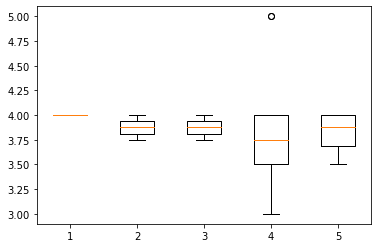

In [32]:
fabricante_pralus = dados.query('Fabricante == "Tobago Estate (Pralus)"')
fabricante_heirloom = dados.query('Fabricante == "Heirloom Cacao Preservation (Zokoko)"')
fabricante_ocelot = dados.query('Fabricante == "Ocelot"')
fabricante_amedei = dados.query('Fabricante == "Amedei"')
fabricante_matale = dados.query('Fabricante == "Matale"')
plt.boxplot([fabricante_pralus.Nota, fabricante_heirloom.Nota, fabricante_ocelot.Nota, fabricante_amedei.Nota, fabricante_matale.Nota]);

In [33]:
fabricantes_melhores_notas.Fabricante.value_counts()

Amedei                                  13
Idilio (Felchlin)                       10
Patric                                   6
Matale                                   4
Acalli                                   2
Chocola'te                               2
Heirloom Cacao Preservation (Zokoko)     2
Obolo                                    2
Ocelot                                   2
Christopher Morel (Felchlin)             1
Dole (Guittard)                          1
Kerchner                                 1
Timo A. Meyer                            1
Tobago Estate (Pralus)                   1
Un Dimanche A Paris                      1
Name: Fabricante, dtype: int64

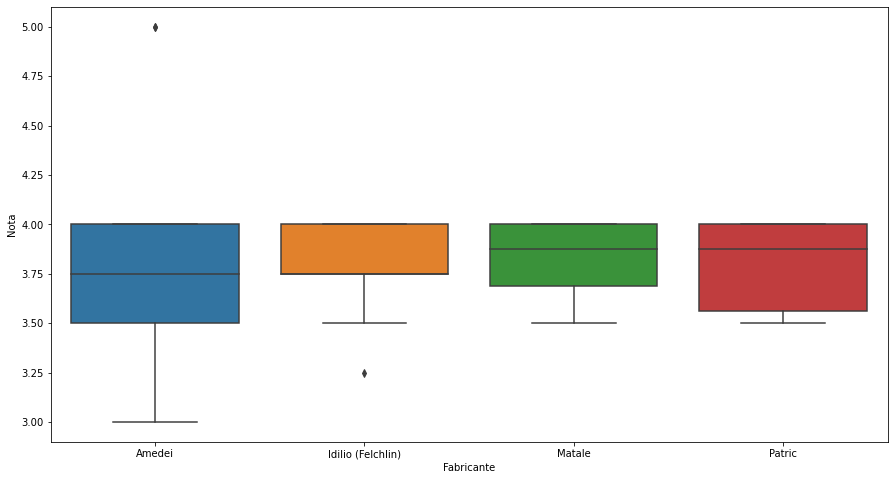

In [34]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Fabricante', y = 'Nota', data = dados.query('Fabricante == ("Amedei", "Matale", "Idilio (Felchlin)", "Patric")'));

In [35]:
fabricante_idilio = dados.query('Fabricante == "Idilio (Felchlin)"')
fabricante_patric = dados.query('Fabricante == "Patric"')

print(' Desvio padrão do fabricante Amedei = %.2f\n' %fabricante_amedei.Nota.std(),
      'Desvio padrão do fabricante Matale = %.2f\n' %fabricante_matale.Nota.std(),
      'Desvio padrão do fabricante Idilio = %.2f\n' %fabricante_idilio.Nota.std(),
      'Desvio padrão do fabricante Patric = %.2f' %fabricante_patric.Nota.std())

 Desvio padrão do fabricante Amedei = 0.62
 Desvio padrão do fabricante Matale = 0.24
 Desvio padrão do fabricante Idilio = 0.25
 Desvio padrão do fabricante Patric = 0.25


In [36]:
print(' Desvio padrão dos 15 melhores fabricantes = %.2f\n' %fabricantes_melhores_notas.Nota.std())

 Desvio padrão dos 15 melhores fabricantes = 0.35



In [37]:
fabricantes_melhores_notas.query('Fabricante == "Idilio (Felchlin)"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
856,Idilio (Felchlin),"Chuao, Venezuela",1085,2013,72%,Switzerland,3.75,Trinitario,Venezuela
857,Idilio (Felchlin),Coopertiva Amazona,725,2011,72%,Switzerland,3.75,Criollo,Venezuela
858,Idilio (Felchlin),"Sur del Lago, Amiari Meridena, Zulia, 48hr c.",725,2011,72%,Switzerland,3.75,,Venezuela
859,Idilio (Felchlin),"Choroni, Finca Torres, 48hr c.",729,2011,72%,Switzerland,3.25,Criollo,Venezuela
860,Idilio (Felchlin),"Ocumare, H. Cata, 48hr c.",733,2011,72%,Switzerland,3.75,Criollo,Venezuela
861,Idilio (Felchlin),"Porcelana, Zulia",733,2011,74%,Switzerland,4.00,Criollo,Venezuela
862,Idilio (Felchlin),"Ocumare, H. Cata, w/ nibs",737,2011,72%,Switzerland,3.50,Criollo,Venezuela
863,Idilio (Felchlin),"Carenero Superior, Urrutia, Barlovento",737,2011,70%,Switzerland,4.00,Trinitario,Venezuela
864,Idilio (Felchlin),Coopertiva Amazona w/ nibs,737,2011,72%,Switzerland,4.00,Criollo,Venezuela
865,Idilio (Felchlin),"Sur del Lago, Amiari Meridena, Zulia, w/ nibs",737,2011,72%,Switzerland,4.00,,Venezuela


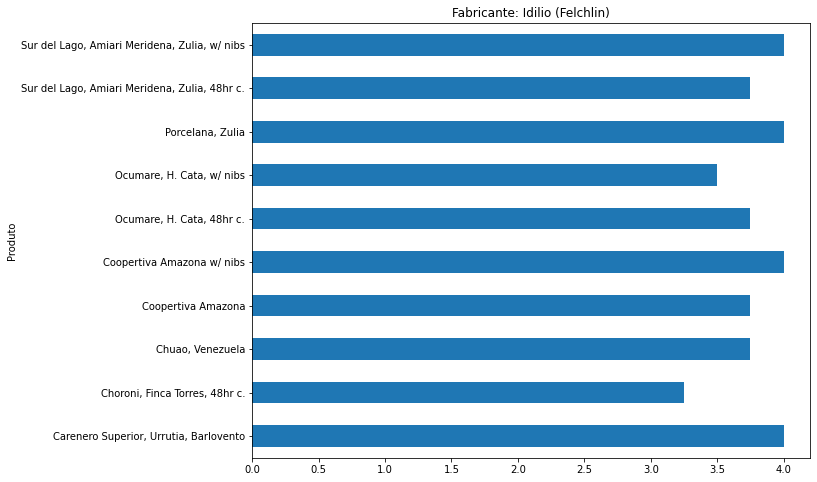

In [38]:
idilio = fabricantes_melhores_notas.query('Fabricante == "Idilio (Felchlin)"')
idilio.groupby('Produto').max()['Nota'].plot(kind = 'barh', figsize = (10, 8), title = 'Fabricante: Idilio (Felchlin)');

In [39]:
fabricantes_melhores_notas.query('Fabricante == "Patric"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1272,Patric,Signature Blend,636,2011,70%,U.S.A.,3.75,Blend,
1273,Patric,Madagascar,331,2009,75%,U.S.A.,4.00,Trinitario,Madagascar
1274,Patric,Madagascar,439,2009,67%,U.S.A.,3.50,Trinitario,Madagascar
1275,Patric,"Rio Caribe, Paria Penninsula",439,2009,70%,U.S.A.,3.50,Trinitario,Venezuela
1276,Patric,Madagascar,196,2007,70%,U.S.A.,4.00,Trinitario,Madagascar
1277,Patric,"Piura, Choc. Garage Exclusive",1034,2013,67%,U.S.A.,4.00,,Peru


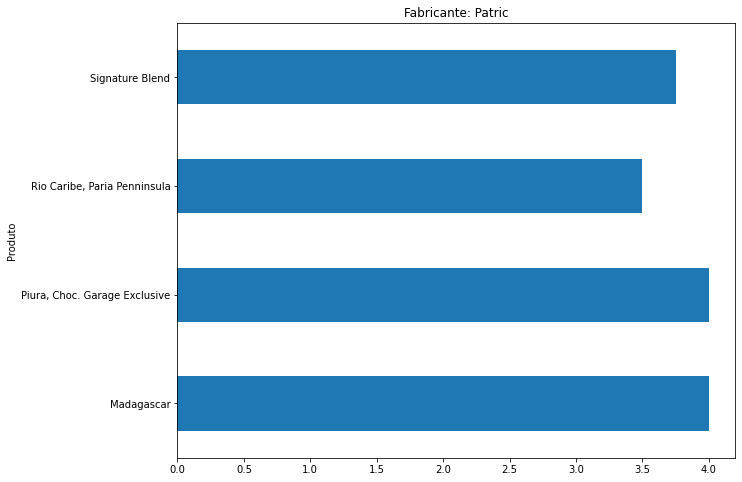

In [40]:
patric = dados.query('Fabricante == "Patric"')
patric.groupby('Produto').max()['Nota'].plot(kind = 'barh', figsize = (10, 8), title = 'Fabricante: Patric');

#### Conclusão:

De acordo com a média das notas, os cinco melhores fabricantes (concorrentes) são:
- Tobago Estate (Pralus)
- Heirloom Cacao Preservation (Zokoko)
- Ocelot
- Amadei
- Matale

Porém, concluir uma análise somente pela média das notas seria um erro, pois ela não mostra como está essa distribuição das avaliações. Uma forma de solucionar isso, é plotando o boxplot. Em que averiguou-se que:
- o fabricante *Tobago Estate (Pralus)* possui somente um produto com nota 4,0;
- os fabricantes *Heirloom* e *Ocelot* apresentaram uma consistência em suas notas, pois elas estão entre 3,75 e 4,0. Mas ao verificar quantos produtos foram avaliados, ambas possuem apenas dois. Ou seja, temos a exibição da menor e da maior nota no boxplot;
- já o fabricante *Amedei* tem produtos avaliados com nota 3,0 à 5,0. Ele possui um outlier com nota máxima, que representa uma exceção, já que os demais produtos receberam notas 3,0 à 4,0;
- e por último, o fabricante *Matale* apresentou uma distribuição mais próxima. Pois seus quatro produtos receberam notas entre 3,75 à 4,0.

Substitui os três primeiros fabricantes por *Idilio* e *Patric*, pois ambos possuem uma quantidade maior de produtos, 10 e 6 respectivamente. No novo boxplot, é possível averiguar que ambos possuem uma consistência nas avaliações. *Idilio* com notas de 3,25 à 4,0 e o fabricante *Patric* com notas de 3,5 à 4,0. 
Diferente do fabricante *Amedei*, com um desvio padrão de 0,62. Tanto a marca *Idilio* quanto a *Patric*, ambas possuem um desvio padrão de 0,25 que indica que seus produtos receberam notas mais próximas umas das outras, valor este, menor do que a distribuição de notas dos 15 melhores fabricantes, que é de 0,35.


# Produtos com melhores notas:

In [41]:
dados.Produto.unique()

array(['Agua Grande', 'Kpime', 'Atsane', ..., 'Indianer, Raw',
       'Kerala State', 'Brazil, Mitzi Blue'], dtype=object)

In [42]:
dados.Produto.value_counts()

Madagascar                        57
Peru                              45
Ecuador                           42
Dominican Republic                37
Venezuela                         21
                                  ..
Conacado, #213, DR, -C             1
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Brazil, Mitzi Blue                 1
Name: Produto, Length: 1039, dtype: int64

In [43]:
dados.groupby('Produto').mean()['Nota']

Produto
"heirloom", Arriba Nacional                 3.50
100 percent                                 1.50
2009 Hapa Nibby                             3.75
A case of the Xerces Blues, triple roast    3.50
ABOCFA Coop                                 4.00
                                            ... 
black label                                 3.00
la Amistad                                  3.50
one hundred                                 2.00
single estate                               2.75
the lost city, gracias a dias, batch 362    3.50
Name: Nota, Length: 1039, dtype: float64

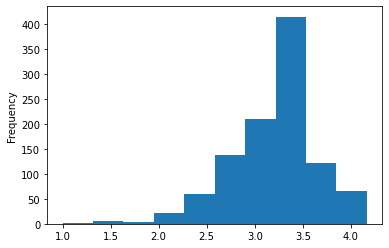

In [44]:
media_coluna = dados.groupby('Produto').mean()['Nota']
media_coluna.plot(kind = 'hist');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


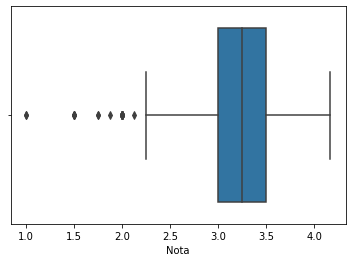

In [45]:
media_por_produto = dados.groupby('Produto').mean()['Nota']
sns.boxplot(media_por_produto);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


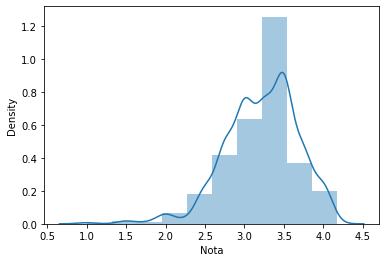

In [46]:
sns.distplot(media_por_produto, bins = 10);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


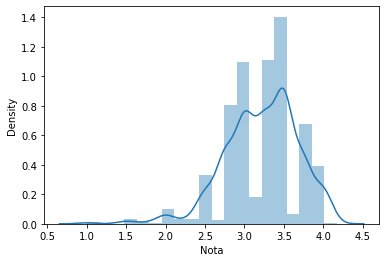

In [47]:
sns.distplot(media_por_produto, bins = 20);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


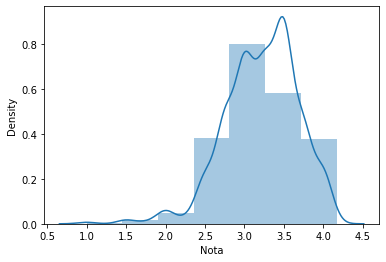

In [48]:
sns.distplot(media_por_produto, bins = 7);

In [49]:
dados.groupby('Produto').mean()['Nota'].sort_values(ascending = False)

Produto
Toscano Black                         4.166667
Porcelana, Zulia                      4.000000
Asante                                4.000000
San Juan de Cheni                     4.000000
Ocumare, Puerto Cabello, Venezuela    4.000000
                                        ...   
Le Noir Extra Amer                    1.500000
Pichincha                             1.500000
One Hundred                           1.500000
Sensations Intense                    1.000000
Baking                                1.000000
Name: Nota, Length: 1039, dtype: float64

In [50]:
dados.query('Nota >= 4.5')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,


In [51]:
dados.query('Nota >= 4')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
9,A. Morin,Pablino,1319,2014,70%,France,4.0,,Peru
17,A. Morin,Chuao,1015,2013,70%,France,4.0,Trinitario,Venezuela
20,A. Morin,Chanchamayo Province,1019,2013,63%,France,4.0,,Peru
54,Amano,Morobe,725,2011,70%,U.S.A.,4.0,,Papua New Guinea
56,Amano,Guayas,470,2010,70%,U.S.A.,4.0,,Ecuador
...,...,...,...,...,...,...,...,...,...
1687,Valrhona,"Porcelana, Pedegral",757,2011,64%,France,4.0,Criollo,Venezuela
1693,Valrhona,Manjari,129,2007,64%,France,4.0,"Criollo, Trinitario",Madagascar
1699,Valrhona,Guanaja,63,2006,70%,France,4.0,"Criollo, Trinitario",South America
1739,Willie's Cacao,Los Llanos,1848,2016,70%,U.K.,4.0,,Colombia


In [52]:
produtos = dados.query('Nota >= 4')
produtos.sort_values(by = ['Nota'], ascending = False)

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,
9,A. Morin,Pablino,1319,2014,70%,France,4.0,,Peru
1244,Pacari,Tangara,1415,2014,70%,Ecuador,4.0,,Ecuador
1330,Pralus,Jamaique,32,2006,75%,France,4.0,Trinitario,Jamaica
...,...,...,...,...,...,...,...,...,...
357,Castronovo,"Maya Mtn, Batch 454, Heirloom",1724,2016,72%,U.S.A.,4.0,Trinitario,Belize
316,Cacao Sampaka,"Xoconusco, Chiapas",346,2009,70%,Spain,4.0,Criollo,Mexico
315,Cacao Sampaka,"Porcelana, Tabasco, La Joya",336,2009,70%,Spain,4.0,Criollo,Mexico
311,Cacao Sampaka,Papua,523,2010,71%,Spain,4.0,,Papua New Guinea


In [53]:
produtos.sort_values(by = ['Nota'], ascending = False).head(15)

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,
9,A. Morin,Pablino,1319,2014,70%,France,4.0,,Peru
1244,Pacari,Tangara,1415,2014,70%,Ecuador,4.0,,Ecuador
1330,Pralus,Jamaique,32,2006,75%,France,4.0,Trinitario,Jamaica
1322,Pralus,Claudio Corallo w/ nibs,162,2007,75%,France,4.0,Forastero,Sao Tome
1294,Pierre Marcolini,"Ocumare, Puerto Cabello, Venezuela",93,2006,72%,Belgium,4.0,Criollo,Venezuela
1292,Pierre Marcolini,"Porcelana, Tabasco, Limited Ed.",81,2006,72%,Belgium,4.0,Criollo,Mexico
1290,Pierre Marcolini,"Sambirano, Ambanja, Madagascar",141,2007,72%,Belgium,4.0,Trinitario,Madagascar
1288,Pierre Marcolini,Cabosse,111,2007,70%,Belgium,4.0,Blend,"Venezuela, Java"


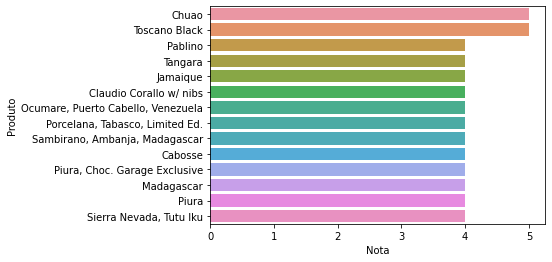

In [54]:
sns.barplot(x = 'Nota',y = 'Produto', data = produtos.sort_values(by = ['Nota'], ascending = False).head(15));

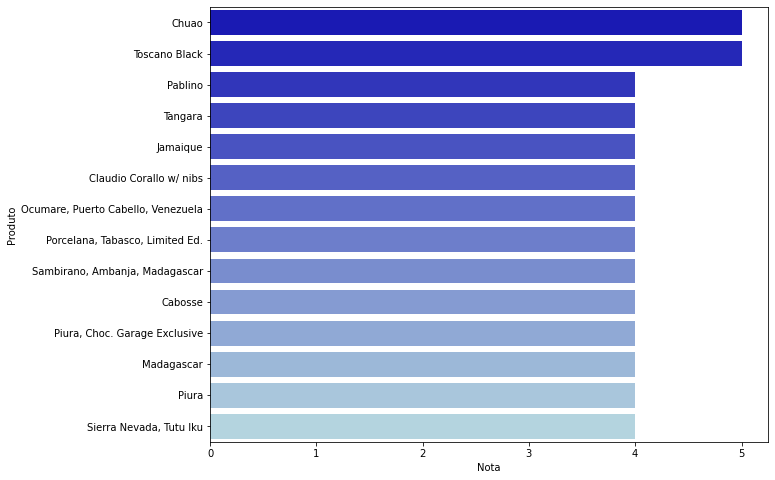

In [55]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Nota',y = 'Produto', data = produtos.sort_values(by = ['Nota'], ascending = False).head(15),
           palette = 'blend:#0000CD,#ADD8E6');

In [56]:
produtos.Fabricante.value_counts()

Soma                                    10
Bonnat                                   8
Amedei                                   6
Valrhona                                 5
Idilio (Felchlin)                        4
Fresco                                   4
Pierre Marcolini                         4
A. Morin                                 3
Pralus                                   3
Michel Cluizel                           3
Arete                                    3
Pacari                                   3
Cacao Sampaka                            3
Patric                                   3
Domori                                   3
Amano                                    2
Matale                                   2
Scharffen Berger                         2
Smooth Chocolator, The                   2
Benoit Nihant                            2
Ritual                                   1
Rogue                                    1
Madecasse (Cinagra)                      1
Ocelot     

In [57]:
produtos.query('Fabricante == "Soma"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1512,Soma,"Tien Giang, Black S., batch VIT60420.0",1828,2016,70%,Canada,4.0,Trinitario,Vietnam
1515,Soma,Porcelana,1594,2015,75%,Canada,4.0,,Venezuela
1528,Soma,Crazy 88,1077,2013,88%,Canada,4.0,,"Guat., D.R., Peru, Mad., PNG"
1529,Soma,"Maracaibo, El Vigia",1077,2013,70%,Canada,4.0,Criollo,Venezuela
1530,Soma,Equator,1081,2013,67%,Canada,4.0,,"Peru, Dom. Rep"
1532,Soma,"Bachelor's Hall E., St. Thomas Parish",1177,2013,70%,Canada,4.0,Trinitario,Jamaica
1535,Soma,"Dual Origins, Sambirano, Elvesia",867,2012,70%,Canada,4.0,Blend,"Dom. Rep., Madagascar"
1536,Soma,"Dancing in Your Head, 5 bean blend",867,2012,70%,Canada,4.0,Blend,"Gre., PNG, Haw., Haiti, Mad"
1543,Soma,Peruvian,676,2011,64%,Canada,4.0,,Peru
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [58]:
produtos.groupby('Local_empresa')['Fabricante'].nunique().sort_values(ascending = False)

Local_empresa
U.S.A.         16
France          6
U.K.            4
Switzerland     3
Italy           2
Belgium         2
Australia       2
Germany         1
Ecuador         1
Colombia        1
Madagascar      1
Sao Tome        1
Scotland        1
Spain           1
Canada          1
Brazil          1
Guatemala       1
Name: Fabricante, dtype: int64

In [59]:
produtos.query('Local_empresa == "U.S.A."')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
54,Amano,Morobe,725,2011,70%,U.S.A.,4.0,,Papua New Guinea
56,Amano,Guayas,470,2010,70%,U.S.A.,4.0,,Ecuador
107,Arete,"Coto Brus, Terciopelo",1908,2016,70%,U.S.A.,4.0,,Costa Rica
108,Arete,Phantom,1924,2016,70%,U.S.A.,4.0,Forastero (Nacional),Peru
117,Arete,Chuno,1598,2015,70%,U.S.A.,4.0,"Criollo, Trinitario",Nicaragua
152,Bar Au Chocolat,Maranon Canyon,1295,2014,70%,U.S.A.,4.0,Forastero (Nacional),Peru
256,Brasstown aka It's Chocolate,Chuao,1355,2014,70%,U.S.A.,4.0,Trinitario,Venezuela
357,Castronovo,"Maya Mtn, Batch 454, Heirloom",1724,2016,72%,U.S.A.,4.0,Trinitario,Belize
600,Durci,Corona Arriba,1630,2015,70%,U.S.A.,4.0,,Ecuador
686,Fresco,"Bellavista Coop, #225, LR, MC, CG Exclusive",1149,2013,70%,U.S.A.,4.0,Trinitario,Peru


In [60]:
produtos.Porcentagem_cacau.value_counts()

70%    45
75%    17
72%    11
74%     4
64%     4
67%     3
63%     3
65%     2
69%     2
68%     2
71%     1
73%     1
60%     1
66%     1
80%     1
78%     1
88%     1
Name: Porcentagem_cacau, dtype: int64

In [61]:
produtos.query('Porcentagem_cacau == "70%"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
9,A. Morin,Pablino,1319,2014,70%,France,4.0,,Peru
17,A. Morin,Chuao,1015,2013,70%,France,4.0,Trinitario,Venezuela
54,Amano,Morobe,725,2011,70%,U.S.A.,4.0,,Papua New Guinea
56,Amano,Guayas,470,2010,70%,U.S.A.,4.0,,Ecuador
76,Amedei,Porcelana,111,2007,70%,Italy,4.0,Criollo (Porcelana),Venezuela
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
83,Amedei,Madagascar,123,2007,70%,Italy,4.0,Trinitario (85% Criollo),Madagascar
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,
107,Arete,"Coto Brus, Terciopelo",1908,2016,70%,U.S.A.,4.0,,Costa Rica
108,Arete,Phantom,1924,2016,70%,U.S.A.,4.0,Forastero (Nacional),Peru


In [62]:
produtos.Tipo_grao.value_counts()

                            32
Trinitario                  26
Criollo                     14
Blend                        6
Criollo, Trinitario          4
Forastero                    4
Criollo (Porcelana)          3
Forastero (Nacional)         3
Trinitario (85% Criollo)     1
Forastero (Parazinho)        1
Forastero (Arriba)           1
Criollo (Ocumare 67)         1
Criollo (Wild)               1
Amazon mix                   1
Beniano                      1
Name: Tipo_grao, dtype: int64

In [63]:
produtos.query('Tipo_grao == "Trinitario"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
17,A. Morin,Chuao,1015,2013,70%,France,4.0,Trinitario,Venezuela
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
179,Benoit Nihant,Rio Peripa H.,1141,2013,73%,Belgium,4.0,Trinitario,Ecuador
180,Benoit Nihant,"Bali, Sukrama Bros. Farm, Melaya, 62hr C",757,2011,72%,Belgium,4.0,Trinitario,Indonesia
244,Bonnat,Madagascar,75,2006,75%,France,4.0,Trinitario,Madagascar
247,Bonnat,Chuao,81,2006,75%,France,4.0,Trinitario,Venezuela
256,Brasstown aka It's Chocolate,Chuao,1355,2014,70%,U.S.A.,4.0,Trinitario,Venezuela
357,Castronovo,"Maya Mtn, Batch 454, Heirloom",1724,2016,72%,U.S.A.,4.0,Trinitario,Belize
686,Fresco,"Bellavista Coop, #225, LR, MC, CG Exclusive",1149,2013,70%,U.S.A.,4.0,Trinitario,Peru
689,Fresco,"Sambirano Valley, #216, MR, LC",915,2012,74%,U.S.A.,4.0,Trinitario,Madagascar


In [64]:
produtos.Origem_grao.value_counts()

Venezuela                       21
Peru                            12
Madagascar                      12
Ecuador                          9
Papua New Guinea                 5
Mexico                           3
Colombia                         3
Bolivia                          3
                                 3
Brazil                           3
Jamaica                          2
Costa Rica                       2
Guatemala                        2
Ghana                            2
Haiti                            2
Tobago                           1
Ven, Bolivia, D.R.               1
Gre., PNG, Haw., Haiti, Mad      1
Dom. Rep., Madagascar            1
Peru, Dom. Rep                   1
Guat., D.R., Peru, Mad., PNG     1
Vietnam                          1
Nicaragua                        1
Sao Tome                         1
Venezuela, Java                  1
Dominican Republic               1
St. Lucia                        1
Sao Tome & Principe              1
Belize              

In [65]:
produtos.query('Origem_grao == "Venezuela"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
17,A. Morin,Chuao,1015,2013,70%,France,4.0,Trinitario,Venezuela
76,Amedei,Porcelana,111,2007,70%,Italy,4.0,Criollo (Porcelana),Venezuela
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
239,Bonnat,"Porcelana, Venezuela",199,2008,75%,France,4.0,Criollo (Porcelana),Venezuela
242,Bonnat,"Ocumare, Puerto Cabello",32,2006,75%,France,4.0,,Venezuela
243,Bonnat,"Maracaibo, El Rosario",48,2006,75%,France,4.0,Criollo,Venezuela
247,Bonnat,Chuao,81,2006,75%,France,4.0,Trinitario,Venezuela
256,Brasstown aka It's Chocolate,Chuao,1355,2014,70%,U.S.A.,4.0,Trinitario,Venezuela
566,Domori,Porcelana,111,2007,70%,Italy,4.0,Criollo (Porcelana),Venezuela
573,Domori,"Ocumare 67, Puertofino",192,2007,70%,Italy,4.0,Criollo (Ocumare 67),Venezuela


# Relação entre porcentagem de cacau X nota:

In [66]:
dados.Porcentagem_cacau.unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

In [67]:
dados.Porcentagem_cacau.value_counts()

70%      672
75%      222
72%      189
65%       78
80%       72
74%       50
68%       47
60%       43
73%       40
85%       36
64%       34
77%       33
71%       31
67%       27
76%       23
66%       23
100%      20
82%       17
78%       17
55%       16
62%       14
63%       12
69%       10
90%        8
61%        8
88%        8
58%        8
81%        5
83%        4
84%        4
72.5%      4
91%        3
56%        2
73.5%      2
99%        2
89%        2
53%        1
46%        1
60.5%      1
57%        1
79%        1
86%        1
50%        1
42%        1
87%        1
Name: Porcentagem_cacau, dtype: int64

In [68]:
dados.groupby('Porcentagem_cacau').median()['Nota']

Porcentagem_cacau
100%     2.125
42%      2.750
46%      2.750
50%      3.750
53%      2.000
55%      2.750
56%      3.250
57%      2.750
58%      3.250
60%      3.000
60.5%    2.750
61%      3.000
62%      3.125
63%      3.625
64%      3.000
65%      3.250
66%      3.500
67%      3.500
68%      3.250
69%      3.500
70%      3.250
71%      3.000
72%      3.250
72.5%    2.750
73%      3.375
73.5%    3.125
74%      3.250
75%      3.250
76%      3.000
77%      3.000
78%      3.500
79%      3.000
80%      3.000
81%      2.750
82%      3.250
83%      2.750
84%      2.750
85%      3.000
86%      3.250
87%      3.250
88%      3.125
89%      2.625
90%      3.125
91%      2.000
99%      2.625
Name: Nota, dtype: float64

In [69]:
porcentagem = dados.groupby('Porcentagem_cacau').median()['Nota']
porcentagem.sort_values(ascending = False).round(3).head(15)

Porcentagem_cacau
50%    3.750
63%    3.625
78%    3.500
69%    3.500
67%    3.500
66%    3.500
73%    3.375
72%    3.250
65%    3.250
87%    3.250
86%    3.250
82%    3.250
75%    3.250
74%    3.250
68%    3.250
Name: Nota, dtype: float64

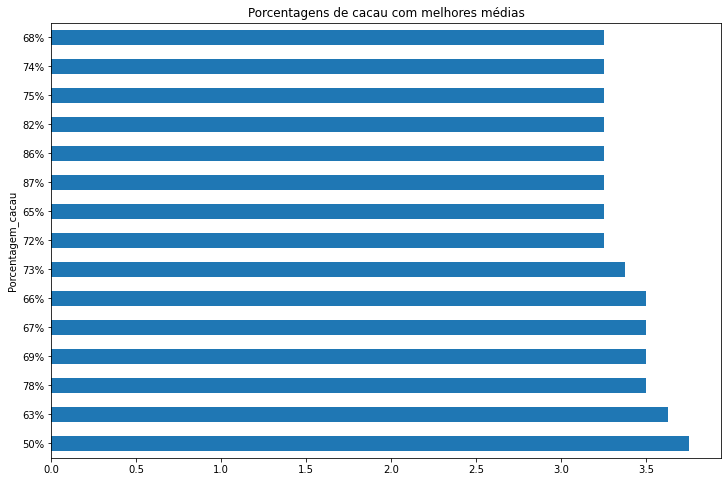

In [70]:
porcentagem.sort_values(ascending = False).round(3).head(15).plot(kind = 'barh', figsize = (12, 8), 
                                                                 title = 'Porcentagens de cacau com melhores médias');

In [71]:
top_15_porcentagem = porcentagem.sort_values(ascending = False).round(3).head(15)
top_15_porcentagem.index

Index(['50%', '63%', '78%', '69%', '67%', '66%', '73%', '72%', '65%', '87%',
       '86%', '82%', '75%', '74%', '68%'],
      dtype='object', name='Porcentagem_cacau')

In [72]:
lista_porcentagem = list(top_15_porcentagem.index)
dados.query('Porcentagem_cacau in @lista_porcentagem')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
20,A. Morin,Chanchamayo Province,1019,2013,63%,France,4.00,,Peru
22,A. Morin,Peru,797,2012,63%,France,3.75,,Peru
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,72%,Fiji,3.50,Trinitario,Fiji
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,75%,Switzerland,3.75,Trinitario,Indonesia
...,...,...,...,...,...,...,...,...,...
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India


In [73]:
porcentagem_melhores_notas = dados.query('Porcentagem_cacau in @lista_porcentagem')
porcentagem_melhores_notas.Fabricante.value_counts()

Bonnat                             26
Pralus                             23
Guittard                           14
Artisan du Chocolat                14
Fresco                             13
                                   ..
Marigold's Finest                   1
Coleman & Davis                     1
Compania de Chocolate (Salgado)     1
Confluence                          1
Lake Champlain (Callebaut)          1
Name: Fabricante, Length: 251, dtype: int64

In [74]:
porcentagem_melhores_notas.groupby('Fabricante')['Porcentagem_cacau'].nunique().sort_values(ascending = False)

Fabricante
Scharffen Berger              6
Valrhona                      6
Zokoko                        5
Marou                         5
Hotel Chocolat (Coppeneur)    5
                             ..
Kah Kow                       1
Kakao                         1
Kallari (Ecuatoriana)         1
Ki' Xocolatl                  1
Loiza                         1
Name: Porcentagem_cacau, Length: 251, dtype: int64

In [75]:
porcentagem_melhores_notas.query('Fabricante == "Scharffen Berger"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1427,Scharffen Berger,San Juan de Cheni,959,2012,78%,U.S.A.,4.00,,Peru
1428,Scharffen Berger,Markham Valley,781,2011,68%,U.S.A.,3.75,,Papua New Guinea
1429,Scharffen Berger,Camahogne,464,2010,68%,U.S.A.,3.50,Trinitario,Grenada
1430,Scharffen Berger,Amina,464,2010,65%,U.S.A.,3.75,"Trinitario, Criollo",Madagascar
1431,Scharffen Berger,Tome Acu,336,2009,68%,U.S.A.,3.75,,Brazil
1432,Scharffen Berger,Asante,336,2009,65%,U.S.A.,4.00,Forastero,Ghana
1433,Scharffen Berger,Ben Tre,445,2009,72%,U.S.A.,3.75,Trinitario,Vietnam
1434,Scharffen Berger,Finisterra,227,2008,72%,U.S.A.,3.00,Blend,"Ven., Trinidad, Mad."
1435,Scharffen Berger,Las Islas,117,2007,72%,U.S.A.,3.00,Blend,Carribean(DR/Jam/Tri)
1437,Scharffen Berger,Cuyagua,135,2007,75%,U.S.A.,3.75,,Venezuela


In [76]:
porcentagem_melhores_notas.query('Fabricante == "Valrhona"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1682,Valrhona,"Piura, Illanka, Quemazon",1510,2015,63%,France,4.00,,Peru
1685,Valrhona,"Otucan, Grand Cru",931,2012,69%,France,4.00,,Venezuela
1689,Valrhona,Alpaco,370,2009,66%,France,3.75,,Ecuador
1690,Valrhona,Nyangbo,395,2009,68%,France,3.50,Forastero,Ghana
1691,Valrhona,Araguani,117,2007,72%,France,3.00,Blend,"Venezuela, Carribean"
1692,Valrhona,Chuao 2002 P.,129,2007,65%,France,3.75,Trinitario,Venezuela
1698,Valrhona,Caraibe,63,2006,66%,France,3.00,Trinitario,Carribean


In [77]:
#porcentagem_melhores_notas.Produto.value_counts()
porcentagem_melhores_notas.groupby('Produto')['Porcentagem_cacau'].nunique().sort_values(ascending = False)

Produto
Madagascar                                  9
Dominican Republic                          9
Peru                                        8
Ecuador                                     8
Venezuela                                   6
                                           ..
Esmeraldas                                  1
Equator                                     1
Ecuador, w/ nibs                            1
Ecuador, Puristique                         1
the lost city, gracias a dias, batch 362    1
Name: Porcentagem_cacau, Length: 505, dtype: int64

In [78]:
porcentagem_melhores_notas.query('Produto == "Madagascar"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
37,Alain Ducasse,Madagascar,1215,2014,75%,France,3.00,Trinitario,Madagascar
70,Ambrosia,Madagascar,1494,2015,66%,Canada,3.25,Trinitario,Madagascar
95,Ara,Madagascar,1375,2014,75%,France,3.00,Trinitario,Madagascar
244,Bonnat,Madagascar,75,2006,75%,France,4.00,Trinitario,Madagascar
410,"Chocolate Tree, The",Madagascar,919,2012,72%,Scotland,3.25,Criollo,Madagascar
523,Dean and Deluca (Belcolade),Madagascar,170,2007,66%,U.S.A.,2.50,Trinitario,Madagascar
595,Durand,Madagascar,841,2012,82%,France,2.75,Trinitario,Madagascar
668,Frederic Blondeel,Madagascar,1351,2014,65%,Belgium,3.50,Trinitario,Madagascar
803,hexx,Madagascar,1546,2015,74%,U.S.A.,3.00,Trinitario,Madagascar
872,Isidro,Madagascar,1275,2014,72%,U.S.A.,3.50,Trinitario,Madagascar


In [79]:
porcentagem_melhores_notas.query('Produto == "Dominican Republic"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
71,Ambrosia,Dominican Republic,1498,2015,75%,Canada,3.25,,Dominican Republic
135,Artisan du Chocolat,Dominican Republic,363,2009,72%,U.K.,3.25,Trinitario,Dominican Republic
273,Bronx Grrl Chocolate,Dominican Republic,1181,2013,68%,U.S.A.,2.75,,Dominican Republic
306,Cacao Prieto,Dominican Republic,641,2011,66%,U.S.A.,3.75,,Dominican Republic
328,C-Amaro,Dominican Republic,1442,2014,72%,Italy,3.00,,Dominican Republic
397,Chocolate Con Amor,Dominican Republic,1764,2016,75%,U.S.A.,3.00,,Dominican Republic
586,Duffy's,Dominican Republic,661,2011,65%,U.K.,3.50,,Dominican Republic
773,Habitual,Dominican Republic,1197,2014,75%,Canada,3.25,,Dominican Republic
875,Isidro,Dominican Republic,1279,2014,72%,U.S.A.,3.25,,Dominican Republic
922,L.A. Burdick (Felchlin),Dominican Republic,576,2010,74%,U.S.A.,3.75,,Dominican Republic


In [80]:
porcentagem_melhores_notas.groupby('Local_empresa')['Porcentagem_cacau'].nunique().sort_values(ascending = False)

Local_empresa
U.S.A.               14
France               10
Canada               10
U.K.                  9
Italy                 9
Australia             8
Austria               7
Belgium               7
Switzerland           6
Madagascar            6
Germany               6
Ecuador               6
Scotland              5
Vietnam               5
Colombia              5
Brazil                4
Peru                  4
New Zealand           4
Spain                 3
Singapore             2
Mexico                2
Venezuela             2
Lithuania             2
Amsterdam             2
Costa Rica            2
Hungary               2
Guatemala             2
Domincan Republic     2
Japan                 1
Fiji                  1
Bolivia               1
Czech Republic        1
Sweden                1
Eucador               1
South Africa          1
Grenada               1
Argentina             1
Sao Tome              1
Puerto Rico           1
Philippines           1
Niacragua             1
Ic

In [81]:
porcentagem_melhores_notas.query('Local_empresa == "U.S.A."')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
93,Anahata,Elvesia,1259,2014,75%,U.S.A.,3.00,,Dominican Republic
94,Animas,Alto Beni,1852,2016,75%,U.S.A.,3.50,,Bolivia
101,Arete,Tien Giang,1900,2016,73%,U.S.A.,3.50,Trinitario,Vietnam
111,Arete,Lam Dong,1928,2016,73%,U.S.A.,3.25,,Vietnam
113,Arete,Nacional,1534,2015,68%,U.S.A.,3.50,Forastero (Nacional),Peru
...,...,...,...,...,...,...,...,...,...
1719,Vintage Plantations,San Martin,1205,2014,75%,U.S.A.,3.00,,Peru
1722,Vintage Plantations (Tulicorp),"Los Rios, Rancho Grande 2004/2007",153,2007,75%,U.S.A.,3.00,Forastero (Arriba),Ecuador
1723,Vintage Plantations (Tulicorp),"Los Rios, Rancho Grande 2007",153,2007,65%,U.S.A.,3.00,Forastero (Arriba),Ecuador
1747,Wm,"Guasare, Zulia Prov., 2015, batch 124",1912,2016,74%,U.S.A.,3.00,Criollo,Venezuela


In [82]:
porcentagem_melhores_notas.Tipo_grao.value_counts()

                          332
Trinitario                199
Criollo                    70
Forastero                  41
Forastero (Nacional)       18
Blend                      16
Forastero (Arriba)         15
Criollo, Trinitario         7
Criollo (Porcelana)         5
Trinitario, Criollo         5
Beniano                     3
Nacional (Arriba)           2
Criollo, Forastero          2
Amazon, ICS                 2
Trinitario, Forastero       2
Amazon mix                  2
Criollo (Ocumare 61)        2
Forastero (Parazinho)       2
Criollo (Wild)              1
Nacional                    1
Criollo, +                  1
CCN51                       1
EET                         1
Forastero (Arriba) ASS      1
Matina                      1
Forastero(Arriba, CCN)      1
Forastero (Catongo)         1
Trinitario, TCGA            1
Name: Tipo_grao, dtype: int64

In [83]:
porcentagem_melhores_notas.query('Tipo_grao == "Trinitario"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,72%,Fiji,3.50,Trinitario,Fiji
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,75%,Switzerland,3.75,Trinitario,Indonesia
35,Alain Ducasse,Trinite,1215,2014,65%,France,2.75,Trinitario,Trinidad
36,Alain Ducasse,Vietnam,1215,2014,75%,France,2.75,Trinitario,Vietnam
37,Alain Ducasse,Madagascar,1215,2014,75%,France,3.00,Trinitario,Madagascar
...,...,...,...,...,...,...,...,...,...
1709,Vao Vao (Chocolaterie Robert),Madagascar w/ nibs,404,2009,68%,Madagascar,3.00,Trinitario,Madagascar
1714,Videri,Trinidad,1211,2014,75%,U.S.A.,3.50,Trinitario,Trinidad
1746,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1772,Zart Pralinen,"San Juan Estate, Gran Couva",1880,2016,78%,Austria,3.50,Trinitario,Trinidad


In [84]:
porcentagem_melhores_notas.Origem_grao.value_counts()

Venezuela                       82
Madagascar                      71
Peru                            66
Ecuador                         65
Dominican Republic              62
                                ..
Africa, Carribean, C. Am.        1
Venez,Africa,Brasil,Peru,Mex     1
Gabon                            1
Sri Lanka                        1
Venezuela, Carribean             1
Name: Origem_grao, Length: 70, dtype: int64

In [85]:
porcentagem_melhores_notas.query('Origem_grao == "Venezuela"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
38,Alain Ducasse,Chuao,1061,2013,75%,France,2.50,Trinitario,Venezuela
98,Ara,Trincheras,1379,2014,75%,France,3.00,,Venezuela
130,Artisan du Chocolat,"Ocumare, Venezuela",355,2009,75%,U.K.,2.50,"Criollo, Trinitario",Venezuela
177,Benoit Nihant,Chuao,1141,2013,74%,Belgium,3.50,Criollo,Venezuela
178,Benoit Nihant,Cuyagua Village,1141,2013,74%,Belgium,3.50,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1685,Valrhona,"Otucan, Grand Cru",931,2012,69%,France,4.00,,Venezuela
1692,Valrhona,Chuao 2002 P.,129,2007,65%,France,3.75,Trinitario,Venezuela
1743,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela
1746,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela


## Dados e estatística:

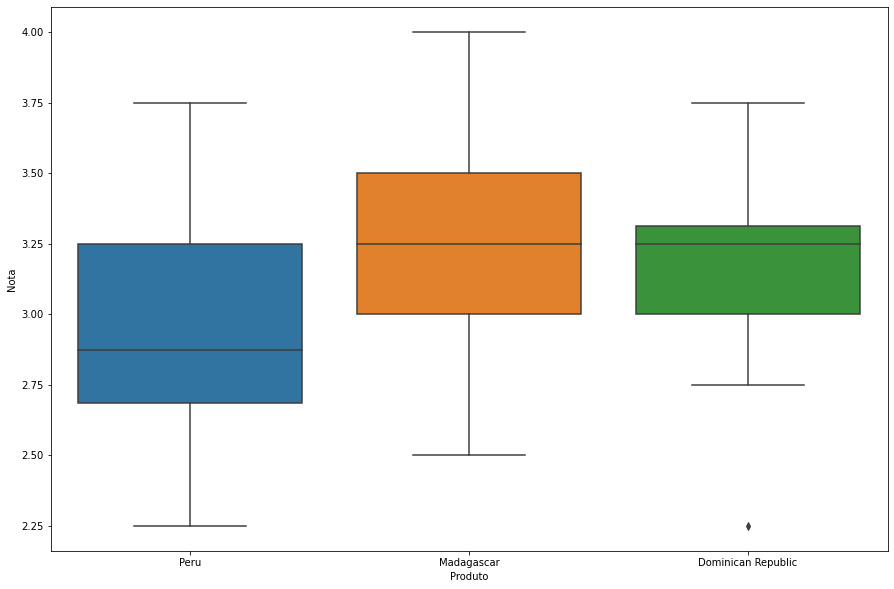

In [86]:
porcentagem_madagascar = porcentagem_melhores_notas.query('Produto == "Madagascar"')
porcentagem_dominican = porcentagem_melhores_notas.query('Produto == "Dominican Republic"')
porcentagem_peru = porcentagem_melhores_notas.query('Produto == "Peru"')

plt.figure(figsize = (15,10))
sns.boxplot(x = 'Produto', y = 'Nota', data = porcentagem_melhores_notas.query('Produto == ("Madagascar", "Dominican Republic", "Peru")'));

In [87]:
print('Desvio padrão das 15 melhores porcentagens = %.2f' %porcentagem_melhores_notas.Nota.std(),
      '\nDesvio padrão dos produtos Madagascar = %.2f' %porcentagem_madagascar.Nota.std(),
      '\nDesvio padrão dos produtos Dominican Republic = %.2f' %porcentagem_dominican.Nota.std(),
      '\nDesvio padrão dos produtos Peru = %.2f' %porcentagem_peru.Nota.std())

Desvio padrão das 15 melhores porcentagens = 0.46 
Desvio padrão dos produtos Madagascar = 0.45 
Desvio padrão dos produtos Dominican Republic = 0.41 
Desvio padrão dos produtos Peru = 0.44


## Dados: Porcentagem

Ao analisar os produtos neste dataframe, verificou-se que há produtos de fabricantes diferentes que compartilham o nome do mesmo produto, por exemplo, existe a barra de chocolate *Madagascar* produzida por 9 empresas distintas, localizadas em diferentes países. Diante este cenário, fiz uma análise estatística de mais dois produtos, *Dominican Republic* e *Peru*.

Ao plotar o boxplot das notas desses produtos, observa-se que, em algum momento, as três receberam notas menores do que 2,75 e a máxima é de 4,0. 

Mesmo atingindo notas mais baixas, estes produtos receberam notas mais próximas do que todos os produtos do dataframe. 

# Sobre o país de origem das empresas:

In [88]:
dados.Local_empresa.value_counts()

U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Costa Rica             9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Ireland                4
Netherlands            4
Fiji                   4
Sao Tome               4
Puerto Rico            4
Mexico                 4


In [89]:
dados.groupby('Local_empresa')['Fabricante'].nunique().sort_values(ascending = False)

Local_empresa
U.S.A.               175
France                22
Canada                20
U.K.                  20
Ecuador               13
Australia             10
Italy                 10
Peru                  10
Germany               10
Japan                  8
Switzerland            8
Belgium                8
Madagascar             6
Colombia               6
Spain                  6
Brazil                 6
New Zealand            6
Venezuela              5
Sweden                 4
Puerto Rico            3
Austria                3
Mexico                 3
Costa Rica             3
Scotland               3
Denmark                3
Poland                 2
Nicaragua              2
South Korea            2
Vietnam                2
Lithuania              2
South Africa           2
Amsterdam              2
Argentina              2
Hungary                2
Domincan Republic      2
Finland                2
Guatemala              2
Niacragua              1
Ghana                  1
Bolivia    

In [90]:
contagem_empresa = dados.Local_empresa.value_counts().to_frame().reset_index()
contagem_empresa.columns = ['local', 'total']
contagem_empresa.head()

,local,total
0,U.S.A.,764
1,France,156
2,Canada,125
3,U.K.,96
4,Italy,63


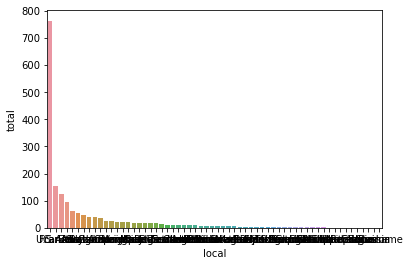

In [91]:
sns.barplot(x = 'local',y = 'total', data = contagem_empresa);

In [92]:
total_empresa = dados['Local_empresa'].value_counts()
total_geral = total_empresa.sum()
total_usa = total_empresa.loc['U.S.A.']
diferenca = total_geral - total_usa
print(total_usa, diferenca)

764 1031


In [93]:
empresas = {
    'empresa' : ['usa','outros'],
    'total' : [total_usa, diferenca]
}

empresas = pd.DataFrame(empresas)
empresas

,empresa,total
0,usa,764
1,outros,1031


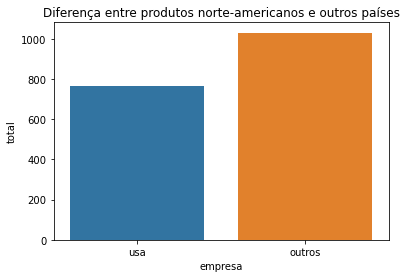

In [108]:
plt.figure(figsize = (6, 4))
sns.barplot(data = empresas, x = 'empresa', y = 'total').set(title = 'Diferença entre produtos norte-americanos e outros países');

In [95]:
dados.query('Local_empresa != "U.S.A."').Local_empresa.value_counts()

France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Madagascar            17
Brazil                17
Peru                  17
Japan                 17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Costa Rica             9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Ireland                4
Puerto Rico            4
Mexico                 4
Sao Tome               4
Fiji                   4
Netherlands            4
Amsterdam              4


In [96]:
empresas_sem_usa = dados.query('Local_empresa != "U.S.A."')
empresas_sem_usa

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


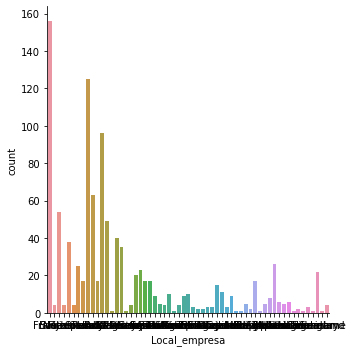

In [97]:
sns.catplot(x = 'Local_empresa', data = empresas_sem_usa, kind="count");

<Figure size 1080x1440 with 0 Axes>

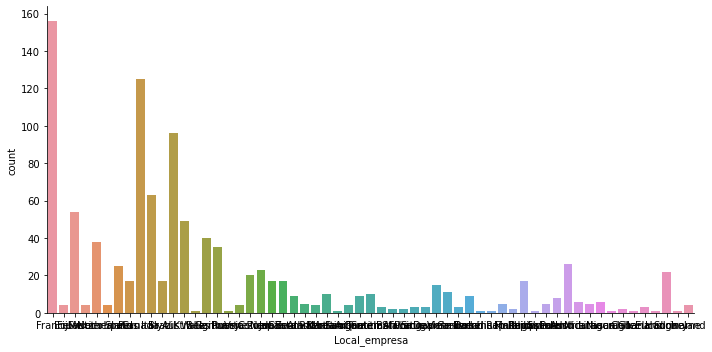

In [98]:
plt.figure(figsize = (15,20))
sns.catplot(x = 'Local_empresa', data = empresas_sem_usa, kind = 'count', aspect = 2);

In [99]:
paises_agrupados = dados.query('Local_empresa != "U.S.A."').Local_empresa.value_counts()

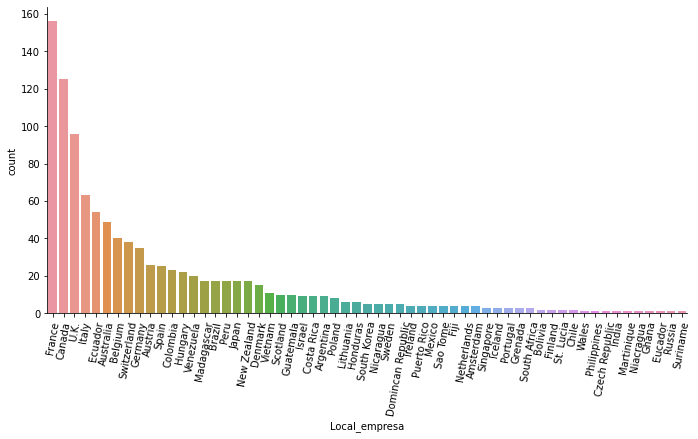

In [100]:
a = sns.catplot(x = 'Local_empresa', data = empresas_sem_usa, kind = 'count', aspect = 2, order = paises_agrupados.index)
a.set_xticklabels(rotation = 80);

In [101]:
top_paises_empresas = dados.query('Local_empresa != "U.S.A."').Local_empresa.value_counts()[:10].index
top_paises_empresas

Index(['France', 'Canada', 'U.K.', 'Italy', 'Ecuador', 'Australia', 'Belgium',
       'Switzerland', 'Germany', 'Austria'],
      dtype='object')

In [102]:
dados.query('Local_empresa in @top_paises_empresas')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


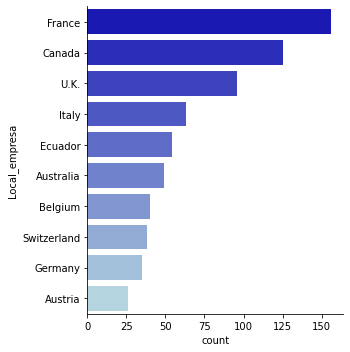

In [103]:
sns.catplot(data = dados.query('Local_empresa in @top_paises_empresas'), y = 'Local_empresa', kind = 'count', 
            order = paises_agrupados[:10].index, palette = 'blend:#0000CD,#ADD8E6');

## Relação entre país de origem X nota:

In [104]:
local = dados.groupby('Local_empresa').mean()['Nota']
local.sort_values(ascending = False).round(3).head(15)

Local_empresa
Chile          3.750
Amsterdam      3.500
Netherlands    3.500
Philippines    3.500
Iceland        3.417
Vietnam        3.409
Brazil         3.397
Poland         3.375
Australia      3.357
Guatemala      3.350
Switzerland    3.342
Singapore      3.333
Italy          3.325
Scotland       3.325
Canada         3.324
Name: Nota, dtype: float64

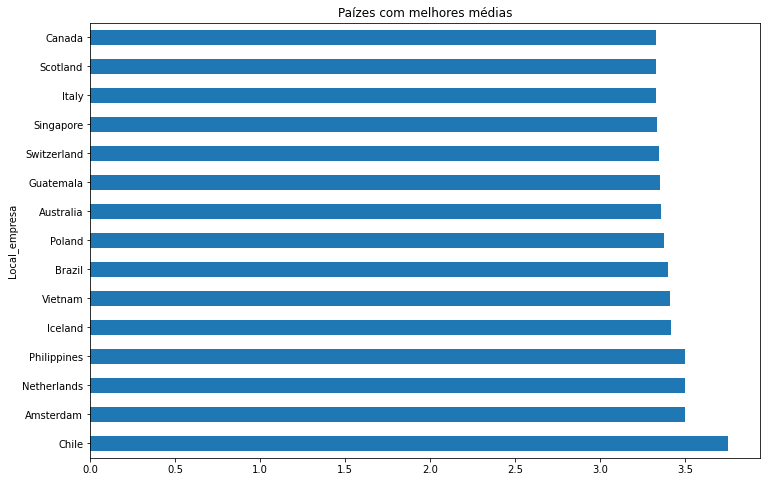

In [105]:
local.sort_values(ascending = False).round(3).head(15).plot(kind = 'barh', figsize = (12, 8), 
                                                                 title = 'Paízes com melhores médias');

In [106]:
top_15_local = local.sort_values(ascending = False).round(3).head(15)
lista_local = list(top_15_local.index)
dados.query('Local_empresa in @lista_local')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,75%,Switzerland,3.75,Trinitario,Indonesia
33,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",502,2010,75%,Switzerland,2.75,Criollo,Madagascar
34,Akesson's (Pralus),"Monte Alegre, D. Badero",508,2010,75%,Switzerland,2.75,Forastero,Brazil
40,Alexandre,"Winak Coop, Napo",1944,2017,70%,Netherlands,3.50,Forastero (Nacional),Ecuador
41,Alexandre,"La Dalia, Matagalpa",1944,2017,70%,Netherlands,3.50,"Criollo, Trinitario",Nicaragua
...,...,...,...,...,...,...,...,...,...
1773,Zokoko,Guadalcanal,1716,2016,78%,Australia,3.75,,Solomon Islands
1774,Zokoko,Goddess Blend,1780,2016,65%,Australia,3.25,,
1775,Zokoko,Alto Beni,697,2011,68%,Australia,3.50,,Bolivia
1776,Zokoko,Tokiala,701,2011,66%,Australia,3.50,Trinitario,Papua New Guinea


In [109]:
local_melhores_notas = dados.query('Local_empresa in @lista_local')
local_melhores_notas.Fabricante.value_counts()

Soma                      47
Domori                    22
Smooth Chocolator, The    16
Amedei                    13
Sirene                    11
                          ..
Metropolitan               1
Haigh                      1
Marigold's Finest          1
Lajedo do Ouro             1
Lindt & Sprungli           1
Name: Fabricante, Length: 70, dtype: int64

In [111]:
local_melhores_notas.query('Fabricante == "Soma"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1507,Soma,"Oko Caribe, Duarte P., Collab w Chocosol",1820,2016,62%,Canada,3.50,,Domincan Republic
1508,Soma,"Sambirano Valley, Black Science, B-60307.0",1820,2016,70%,Canada,3.50,Trinitario,Madagascar
1509,Soma,"Bahia Black, batch bra50722.1",1828,2016,70%,Canada,3.50,Forastero (Parazinho),Brazil
1510,Soma,"Abstract S. w/ Jamaica nibs,batch abs60323.0",1828,2016,75%,Canada,3.75,,"Ven.,Ecu.,Peru,Nic."
1511,Soma,"Chuno, San Jose de Bocay, Pantasma R.,B.S.",1828,2016,70%,Canada,3.75,Trinitario,Nicaragua
1512,Soma,"Tien Giang, Black S., batch VIT60420.0",1828,2016,70%,Canada,4.00,Trinitario,Vietnam
1513,Soma,"Camino Verde, Black S., batch cvu6030.0",1832,2016,70%,Canada,3.25,,Ecuador
1514,Soma,CSB Chama,1594,2015,70%,Canada,3.50,Criollo,Venezuela
1515,Soma,Porcelana,1594,2015,75%,Canada,4.00,,Venezuela
1516,Soma,"La Tronca, Matagalpa",1227,2014,70%,Canada,3.50,,Nicaragua


In [112]:
local_melhores_notas.groupby('Produto')['Porcentagem_cacau'].nunique().sort_values(ascending = False)

Produto
Brazil                                        6
Ecuador                                       5
Papua New Guinea                              5
Venezuela                                     4
Madagascar                                    4
                                             ..
Grenada, Black Science                        1
Guadalcanal                                   1
Guasare                                       1
Guasare, La Sierra de Perija, batch gua001    1
one hundred                                   1
Name: Porcentagem_cacau, Length: 261, dtype: int64

In [113]:
local_melhores_notas.query('Produto == "Brazil"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1348,Q Chocolate,Brazil,1057,2013,75%,Brazil,3.25,,Brazil
1349,Q Chocolate,Brazil,1057,2013,85%,Brazil,3.50,,Brazil
1350,Q Chocolate,Brazil,1069,2013,55%,Brazil,2.75,,Brazil
1351,Q Chocolate,Brazil,1069,2013,80%,Brazil,3.25,,Brazil
1352,Q Chocolate,Brazil,935,2012,60%,Brazil,3.00,,Brazil
1353,Q Chocolate,Brazil,935,2012,65%,Brazil,3.25,,Brazil


In [114]:
local_melhores_notas.Porcentagem_cacau.value_counts()

70%     156
72%      39
75%      30
68%      13
80%      13
65%      12
64%      11
73%       9
67%       8
85%       8
74%       7
100%      6
60%       6
66%       6
78%       5
76%       4
88%       2
82%       2
63%       2
62%       2
77%       2
69%       1
50%       1
83%       1
58%       1
55%       1
Name: Porcentagem_cacau, dtype: int64

In [115]:
local_melhores_notas.query('Porcentagem_cacau == "70%"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
40,Alexandre,"Winak Coop, Napo",1944,2017,70%,Netherlands,3.50,Forastero (Nacional),Ecuador
41,Alexandre,"La Dalia, Matagalpa",1944,2017,70%,Netherlands,3.50,"Criollo, Trinitario",Nicaragua
42,Alexandre,Tien Giang,1944,2017,70%,Netherlands,3.50,Trinitario,Vietnam
43,Alexandre,"Makwale Village, Kyela",1944,2017,70%,Netherlands,3.50,Forastero,Tanzania
73,Ambrosia,Venezuela,1498,2015,70%,Canada,3.25,,Venezuela
...,...,...,...,...,...,...,...,...,...
1557,Soul,Madagascar,1936,2017,70%,Canada,3.50,,Madagascar
1568,Spencer,"Dominican Republic, lot D82R",1792,2016,70%,Australia,3.50,,Domincan Republic
1569,Spencer,"Ecuador, lot E432314L",1792,2016,70%,Australia,3.75,,Ecuador
1570,Spencer,"Madagascar, lot M0403R",1792,2016,70%,Australia,3.75,,Madagascar


In [110]:
local_melhores_notas.groupby('Local_empresa')['Fabricante'].nunique().sort_values(ascending = False)

Local_empresa
Canada         20
Australia      10
Italy          10
Switzerland     8
Brazil          6
Scotland        3
Amsterdam       2
Guatemala       2
Poland          2
Vietnam         2
Chile           1
Iceland         1
Netherlands     1
Philippines     1
Singapore       1
Name: Fabricante, dtype: int64

In [116]:
local_melhores_notas.Local_empresa.value_counts()

Canada         125
Italy           63
Australia       49
Switzerland     38
Brazil          17
Vietnam         11
Scotland        10
Guatemala       10
Poland           8
Netherlands      4
Amsterdam        4
Singapore        3
Iceland          3
Chile            2
Philippines      1
Name: Local_empresa, dtype: int64

In [117]:
local_melhores_notas.query('Local_empresa == "Canada"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
69,Ambrosia,Belize,1494,2015,64%,Canada,3.00,Trinitario,Belize
70,Ambrosia,Madagascar,1494,2015,66%,Canada,3.25,Trinitario,Madagascar
71,Ambrosia,Dominican Republic,1498,2015,75%,Canada,3.25,,Dominican Republic
72,Ambrosia,Papua New Guinea,1498,2015,63%,Canada,3.25,,Papua New Guinea
73,Ambrosia,Venezuela,1498,2015,70%,Canada,3.25,,Venezuela
...,...,...,...,...,...,...,...,...,...
1557,Soul,Madagascar,1936,2017,70%,Canada,3.50,,Madagascar
1558,Soul,Venezuela,1936,2017,75%,Canada,3.50,,Venezuela
1559,Soul,Ecuador,1936,2017,75%,Canada,3.25,,Ecuador
1560,Soul,Papua New Guinea,1936,2017,77%,Canada,3.25,,Papua New Guinea


In [118]:
local_melhores_notas.Tipo_grao.value_counts()

                            137
Trinitario                   93
Criollo                      45
Forastero                    18
Blend                        14
Forastero (Nacional)          8
Forastero (Parazinho)         6
Criollo, Trinitario           4
Forastero (Arriba)            3
Criollo (Porcelana)           3
Forastero (Catongo)           2
Trinitario (85% Criollo)      2
Trinitario, Criollo           2
Criollo (Ocumare 77)          1
Criollo (Ocumare 61)          1
Criollo (Ocumare 67)          1
Criollo (Wild)                1
Forastero (Arriba) ASS        1
Blend-Forastero,Criollo       1
Trinitario (Scavina)          1
Forastero (Amelonado)         1
Nacional                      1
Trinitario, Nacional          1
Name: Tipo_grao, dtype: int64

In [119]:
local_melhores_notas.query('Tipo_grao == "Trinitario"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,75%,Switzerland,3.75,Trinitario,Indonesia
42,Alexandre,Tien Giang,1944,2017,70%,Netherlands,3.50,Trinitario,Vietnam
69,Ambrosia,Belize,1494,2015,64%,Canada,3.00,Trinitario,Belize
70,Ambrosia,Madagascar,1494,2015,66%,Canada,3.25,Trinitario,Madagascar
78,Amedei,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
...,...,...,...,...,...,...,...,...,...
1551,Soma,Papua New Guinea,387,2009,70%,Canada,3.50,Trinitario,Papua New Guinea
1571,Spencer,Malekula Island,1434,2014,72%,Australia,2.75,Trinitario,Vanuatu
1580,Stella (aka Bernrain),"Bahia, Agri-Forestal Plantation, 2010",859,2012,68%,Switzerland,2.75,Trinitario,Brazil
1681,Urzi,"Sur del Lago, Merida",1327,2014,65%,Italy,3.25,Trinitario,Venezuela


In [120]:
local_melhores_notas.Origem_grao.value_counts()

Venezuela                       54
Madagascar                      26
Brazil                          25
Ecuador                         25
                                24
Dominican Republic              21
Peru                            20
Vietnam                         16
Papua New Guinea                14
Bolivia                         13
Guatemala                       13
Tanzania                        11
Nicaragua                        7
Trinidad                         7
Colombia                         5
Carribean                        5
Belize                           5
Vanuatu                          5
Mexico                           4
Indonesia                        4
Congo                            3
Ghana                            3
Australia                        3
Grenada                          3
Domincan Republic                2
Haiti                            2
Hawaii                           2
Jamaica                          2
Cuba                

In [121]:
local_melhores_notas.query('Origem_grao == "Venezuela"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
73,Ambrosia,Venezuela,1498,2015,70%,Canada,3.25,,Venezuela
76,Amedei,Porcelana,111,2007,70%,Italy,4.00,Criollo (Porcelana),Venezuela
78,Amedei,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
82,Amedei,Venezuela,123,2007,70%,Italy,3.75,Trinitario (85% Criollo),Venezuela
184,Beschle (Felchlin),Maracaibo,636,2011,88%,Switzerland,3.00,Criollo,Venezuela
185,Beschle (Felchlin),"Indigena Amazonia, Grand Cru, Quizas",636,2011,72%,Switzerland,3.50,,Venezuela
187,Beschle (Felchlin),"Carenero S., Barlovento, Grand Cru",508,2010,70%,Switzerland,3.25,Trinitario,Venezuela
188,Beschle (Felchlin),"Porcelana, Premier Cru, Quizas No. 1",508,2010,74%,Switzerland,3.25,Criollo (Porcelana),Venezuela
190,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
331,C-Amaro,Venezuela,809,2012,80%,Italy,3.00,,Venezuela


## Dados e estatística:

# Relação entre tipo de grão de cacau X nota:

In [122]:
dados.Tipo_grao.unique()

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [170]:
dados.Tipo_grao.value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

In [167]:
dados.groupby('Tipo_grao').mean()['Nota'].sort_values(ascending = False)

Tipo_grao
Criollo (Wild)              4.000000
Criollo (Ocumare 67)        4.000000
Trinitario (85% Criollo)    3.875000
Trinitario, TCGA            3.750000
Amazon mix                  3.750000
Criollo (Ocumare 77)        3.750000
Trinitario, Nacional        3.750000
Forastero (Amelonado)       3.750000
Blend-Forastero,Criollo     3.750000
Criollo, Forastero          3.625000
Amazon, ICS                 3.625000
Beniano                     3.583333
EET                         3.583333
Forastero (Parazinho)       3.531250
Trinitario (Scavina)        3.500000
Forastero (Arriba) ASSS     3.500000
CCN51                       3.500000
Criollo, +                  3.500000
Matina                      3.416667
Criollo (Porcelana)         3.375000
Forastero (Catongo)         3.375000
Blend                       3.353659
Criollo, Trinitario         3.294872
Forastero (Nacional)        3.269231
Nacional (Arriba)           3.250000
Amazon                      3.250000
Criollo (Ocumare 61)        

In [125]:
len(dados.groupby('Tipo_grao').mean()['Nota'])

41

In [126]:
tipo_grao = dados.groupby('Tipo_grao').mean()['Nota']
tipo_grao.sort_values(ascending = False).round(3).head(15)

Tipo_grao
Criollo (Wild)              4.000
Criollo (Ocumare 67)        4.000
Trinitario (85% Criollo)    3.875
Trinitario, TCGA            3.750
Amazon mix                  3.750
Criollo (Ocumare 77)        3.750
Trinitario, Nacional        3.750
Forastero (Amelonado)       3.750
Blend-Forastero,Criollo     3.750
Criollo, Forastero          3.625
Amazon, ICS                 3.625
Beniano                     3.583
EET                         3.583
Forastero (Parazinho)       3.531
Trinitario (Scavina)        3.500
Name: Nota, dtype: float64

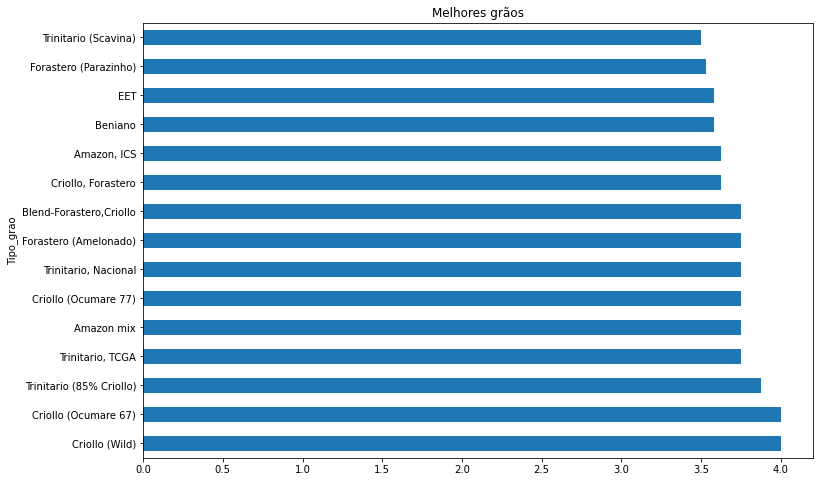

In [127]:
tipo_grao.sort_values(ascending = False).round(3).head(15).plot(kind = 'barh', figsize = (12, 8), 
                                                                 title = 'Melhores grãos');

In [128]:
top_15_tipo_grao = tipo_grao.sort_values(ascending = False).round(3).head(15)
lista_tipo_grao = list(top_15_tipo_grao.index)
dados.query('Tipo_grao in @lista_tipo_grao')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
82,Amedei,Venezuela,123,2007,70%,Italy,3.75,Trinitario (85% Criollo),Venezuela
83,Amedei,Madagascar,123,2007,70%,Italy,4.00,Trinitario (85% Criollo),Madagascar
89,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,85%,Brazil,2.75,Forastero (Parazinho),Brazil
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,50%,Brazil,3.75,Forastero (Parazinho),Brazil
91,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,75%,Brazil,3.75,Forastero (Parazinho),Brazil
92,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,60%,Brazil,4.00,Forastero (Parazinho),Brazil
556,Domori,Ocumare 77,1672,2015,70%,Italy,3.75,Criollo (Ocumare 77),Venezuela
573,Domori,"Ocumare 67, Puertofino",192,2007,70%,Italy,4.00,Criollo (Ocumare 67),Venezuela
649,Felchlin,"Alto Beni, Cru Savage",56,2006,68%,Switzerland,4.00,Criollo (Wild),Bolivia
718,Fruition,"Wild Bolivian, Batch 2",1780,2016,74%,U.S.A.,3.75,Beniano,Bolivia


In [171]:
tipo_grao_melhores_notas.shape

(30, 9)

In [129]:
tipo_grao_melhores_notas = dados.query('Tipo_grao in @lista_tipo_grao')
tipo_grao_melhores_notas.Fabricante.value_counts()

AMMA                                       4
Heirloom Cacao Preservation (Guittard)     3
Soma                                       3
Amedei                                     2
Heirloom Cacao Preservation (Zokoko)       2
Fruition                                   2
Domori                                     2
Heirloom Cacao Preservation (Fruition)     1
Heirloom Cacao Preservation (Millcreek)    1
Heirloom Cacao Preservation (Mindo)        1
Felchlin                                   1
Maglio                                     1
Mission                                    1
Nugali                                     1
Pierre Marcolini                           1
Pralus                                     1
Szanto Tibor                               1
Tejas                                      1
Timo A. Meyer                              1
Name: Fabricante, dtype: int64

In [130]:
# Fabricante com mais produtos no dataframe
tipo_grao_melhores_notas.query('Fabricante == "AMMA"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
89,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,85%,Brazil,2.75,Forastero (Parazinho),Brazil
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,50%,Brazil,3.75,Forastero (Parazinho),Brazil
91,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,75%,Brazil,3.75,Forastero (Parazinho),Brazil
92,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,60%,Brazil,4.00,Forastero (Parazinho),Brazil


In [131]:
# Fabricante com maior variedade de tipos de grão
tipo_grao_melhores_notas.groupby('Fabricante')['Tipo_grao'].nunique().sort_values(ascending = False)

Fabricante
Heirloom Cacao Preservation (Guittard)     3
Soma                                       3
Heirloom Cacao Preservation (Zokoko)       2
Domori                                     2
Fruition                                   2
Mission                                    1
Tejas                                      1
Szanto Tibor                               1
Pralus                                     1
Pierre Marcolini                           1
Nugali                                     1
AMMA                                       1
Maglio                                     1
Amedei                                     1
Heirloom Cacao Preservation (Mindo)        1
Heirloom Cacao Preservation (Millcreek)    1
Heirloom Cacao Preservation (Fruition)     1
Felchlin                                   1
Timo A. Meyer                              1
Name: Tipo_grao, dtype: int64

In [132]:
tipo_grao_melhores_notas.query('Fabricante == "Heirloom Cacao Preservation (Guittard)"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
791,Heirloom Cacao Preservation (Guittard),"Alto Beni, Upper Rio Beni, 2014",1239,2014,67%,U.S.A.,3.50,"Amazon, ICS",Bolivia
792,Heirloom Cacao Preservation (Guittard),"Wild Beni, Lower Rio Beni, Tranquilidad, 2014",1243,2014,67%,U.S.A.,3.00,Beniano,Bolivia
793,Heirloom Cacao Preservation (Guittard),"Los Rios, Hacienda Limon, Orecao, 2014",1243,2014,67%,U.S.A.,3.75,EET,Ecuador


In [133]:
tipo_grao_melhores_notas.Produto.value_counts()

Monte Alegre, 3 diff. plantations                4
Venezuela                                        1
Alto Beni, Upper Rio Beni, 2015                  1
Bahia, Floresta Azul,Good Friends Reserve#3      1
Fazenda Sempre Firme, Bahia                      1
Black Science Blend 1                            1
Espiritu Santo, 'Smoke Monster'                  1
Bahia Black, batch bra50722.1                    1
Djakarta, Java and Ghana                         1
Baracoa, Cuba                                    1
Fazenda Leolinda                                 1
Bahia, Fazenda Venturosa                         1
Santo Domingo                                    1
Wild Beni, Lower Rio Beni, Tranquilidad, 2015    1
Pinchincha, Mindo, Coop Nueva Esper., 2015       1
Madagascar                                       1
Los Rios, Hacienda Limon, Orecao, 2015           1
Los Rios, Hacienda Limon, Orecao, 2014           1
Wild Beni, Lower Rio Beni, Tranquilidad, 2014    1
Alto Beni, Upper Rio Beni, 2014

In [134]:
tipo_grao_melhores_notas.query('Produto == "Monte Alegre, 3 diff. plantations"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
89,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,85%,Brazil,2.75,Forastero (Parazinho),Brazil
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,50%,Brazil,3.75,Forastero (Parazinho),Brazil
91,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,75%,Brazil,3.75,Forastero (Parazinho),Brazil
92,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,60%,Brazil,4.00,Forastero (Parazinho),Brazil


In [135]:
tipo_grao_melhores_notas.Porcentagem_cacau.value_counts()

70%    13
74%     3
67%     3
75%     2
68%     2
72%     2
85%     1
50%     1
60%     1
77%     1
78%     1
Name: Porcentagem_cacau, dtype: int64

In [136]:
tipo_grao_melhores_notas.query('Porcentagem_cacau == "70%"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
82,Amedei,Venezuela,123,2007,70%,Italy,3.75,Trinitario (85% Criollo),Venezuela
83,Amedei,Madagascar,123,2007,70%,Italy,4.00,Trinitario (85% Criollo),Madagascar
556,Domori,Ocumare 77,1672,2015,70%,Italy,3.75,Criollo (Ocumare 77),Venezuela
573,Domori,"Ocumare 67, Puertofino",192,2007,70%,Italy,4.00,Criollo (Ocumare 67),Venezuela
796,Heirloom Cacao Preservation (Millcreek),"Los Rios, Hacienda Limon, Orecao, 2015",1744,2016,70%,U.S.A.,3.50,EET,Ecuador
1008,Maglio,Santo Domingo,308,2008,70%,Italy,3.75,"Blend-Forastero,Criollo",Dominican Republic
1138,Mission,"Bahia, Fazenda Venturosa",1626,2015,70%,Brazil,3.50,Forastero (Parazinho),Brazil
1198,Nugali,Fazenda Leolinda,1876,2016,70%,Brazil,3.50,Trinitario (Scavina),Brazil
1509,Soma,"Bahia Black, batch bra50722.1",1828,2016,70%,Canada,3.50,Forastero (Parazinho),Brazil
1520,Soma,"Espiritu Santo, 'Smoke Monster'",1307,2014,70%,Canada,3.75,Forastero (Amelonado),Vanuatu


In [137]:
tipo_grao_melhores_notas.Local_empresa.value_counts()

U.S.A.         11
Brazil          6
Italy           5
Canada          3
Switzerland     1
Belgium         1
France          1
Hungary         1
Germany         1
Name: Local_empresa, dtype: int64

In [138]:
tipo_grao_melhores_notas.query('Local_empresa == "U.S.A."')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
718,Fruition,"Wild Bolivian, Batch 2",1780,2016,74%,U.S.A.,3.75,Beniano,Bolivia
719,Fruition,"Coto Brus, Heirloom, Batch 1",1780,2016,74%,U.S.A.,4.00,Amazon mix,Costa Rica
790,Heirloom Cacao Preservation (Fruition),"Cota Brus, Terciopelo, 2015",1748,2016,74%,U.S.A.,3.50,Amazon mix,Costa Rica
791,Heirloom Cacao Preservation (Guittard),"Alto Beni, Upper Rio Beni, 2014",1239,2014,67%,U.S.A.,3.50,"Amazon, ICS",Bolivia
792,Heirloom Cacao Preservation (Guittard),"Wild Beni, Lower Rio Beni, Tranquilidad, 2014",1243,2014,67%,U.S.A.,3.00,Beniano,Bolivia
793,Heirloom Cacao Preservation (Guittard),"Los Rios, Hacienda Limon, Orecao, 2014",1243,2014,67%,U.S.A.,3.75,EET,Ecuador
796,Heirloom Cacao Preservation (Millcreek),"Los Rios, Hacienda Limon, Orecao, 2015",1744,2016,70%,U.S.A.,3.50,EET,Ecuador
797,Heirloom Cacao Preservation (Mindo),"Pinchincha, Mindo, Coop Nueva Esper., 2015",1748,2016,77%,U.S.A.,3.50,EET,Ecuador
798,Heirloom Cacao Preservation (Zokoko),"Alto Beni, Upper Rio Beni, 2015",1744,2016,68%,U.S.A.,3.75,"Amazon, ICS",Bolivia
799,Heirloom Cacao Preservation (Zokoko),"Wild Beni, Lower Rio Beni, Tranquilidad, 2015",1744,2016,72%,U.S.A.,4.00,Beniano,Bolivia


In [172]:
tipo_grao_melhores_notas.Tipo_grao.value_counts()

Forastero (Parazinho)       8
Beniano                     3
EET                         3
Trinitario (85% Criollo)    2
Amazon mix                  2
Amazon, ICS                 2
Criollo, Forastero          2
Criollo (Ocumare 77)        1
Criollo (Ocumare 67)        1
Criollo (Wild)              1
Blend-Forastero,Criollo     1
Trinitario (Scavina)        1
Forastero (Amelonado)       1
Trinitario, Nacional        1
Trinitario, TCGA            1
Name: Tipo_grao, dtype: int64

In [140]:
tipo_grao_melhores_notas.query('Tipo_grao == "Forastero (Parazinho)"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
89,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,85%,Brazil,2.75,Forastero (Parazinho),Brazil
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,50%,Brazil,3.75,Forastero (Parazinho),Brazil
91,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,75%,Brazil,3.75,Forastero (Parazinho),Brazil
92,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,60%,Brazil,4.00,Forastero (Parazinho),Brazil
1138,Mission,"Bahia, Fazenda Venturosa",1626,2015,70%,Brazil,3.50,Forastero (Parazinho),Brazil
1509,Soma,"Bahia Black, batch bra50722.1",1828,2016,70%,Canada,3.50,Forastero (Parazinho),Brazil
1599,Szanto Tibor,"Fazenda Sempre Firme, Bahia",1708,2015,70%,Hungary,3.50,Forastero (Parazinho),Brazil
1643,Tejas,"Bahia, Floresta Azul,Good Friends Reserve#3",971,2012,70%,U.S.A.,3.50,Forastero (Parazinho),Brazil


In [141]:
tipo_grao_melhores_notas.Origem_grao.value_counts()

Brazil                9
Bolivia               6
Venezuela             3
Ecuador               3
Costa Rica            2
Madagascar            1
Dominican Republic    1
Cuba                  1
Indonesia, Ghana      1
Vanuatu               1
DR, Ecuador, Peru     1
Belize                1
Name: Origem_grao, dtype: int64

In [142]:
tipo_grao_melhores_notas.query('Origem_grao == "Brazil"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
89,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,85%,Brazil,2.75,Forastero (Parazinho),Brazil
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,50%,Brazil,3.75,Forastero (Parazinho),Brazil
91,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,75%,Brazil,3.75,Forastero (Parazinho),Brazil
92,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,60%,Brazil,4.00,Forastero (Parazinho),Brazil
1138,Mission,"Bahia, Fazenda Venturosa",1626,2015,70%,Brazil,3.50,Forastero (Parazinho),Brazil
1198,Nugali,Fazenda Leolinda,1876,2016,70%,Brazil,3.50,Trinitario (Scavina),Brazil
1509,Soma,"Bahia Black, batch bra50722.1",1828,2016,70%,Canada,3.50,Forastero (Parazinho),Brazil
1599,Szanto Tibor,"Fazenda Sempre Firme, Bahia",1708,2015,70%,Hungary,3.50,Forastero (Parazinho),Brazil
1643,Tejas,"Bahia, Floresta Azul,Good Friends Reserve#3",971,2012,70%,U.S.A.,3.50,Forastero (Parazinho),Brazil


# Relação entre país de origem do grão X nota:

In [143]:
dados.Origem_grao.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [144]:
dados.Origem_grao.value_counts()

Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Trinidad, Ecuador          1
Venezuela, Carribean       1
Name: Origem_grao, Length: 100, dtype: int64

In [168]:
dados.groupby('Origem_grao').mean().round(3)['Nota'].sort_values(ascending = False)

Origem_grao
Ven, Bolivia, D.R.              4.000
Dom. Rep., Madagascar           4.000
Guat., D.R., Peru, Mad., PNG    4.000
Venezuela, Java                 4.000
Gre., PNG, Haw., Haiti, Mad     4.000
                                ...  
West Africa                     2.583
Peru, Madagascar                2.500
Venezuela, Trinidad             2.500
Puerto Rico                     2.500
Ghana & Madagascar              2.000
Name: Nota, Length: 100, dtype: float64

In [146]:
origem_grao = dados.groupby('Origem_grao').mean().round(3)['Nota']
origem_grao.sort_values(ascending = False).round(3).head(15)

Origem_grao
Ven, Bolivia, D.R.              4.000
Dom. Rep., Madagascar           4.000
Guat., D.R., Peru, Mad., PNG    4.000
Venezuela, Java                 4.000
Gre., PNG, Haw., Haiti, Mad     4.000
Peru, Dom. Rep                  4.000
Dominican Rep., Bali            3.750
Ven.,Ecu.,Peru,Nic.             3.750
Peru, Belize                    3.750
PNG, Vanuatu, Mad               3.750
Venez,Africa,Brasil,Peru,Mex    3.750
DR, Ecuador, Peru               3.750
South America                   3.667
Tobago                          3.625
Mad., Java, PNG                 3.500
Name: Nota, dtype: float64

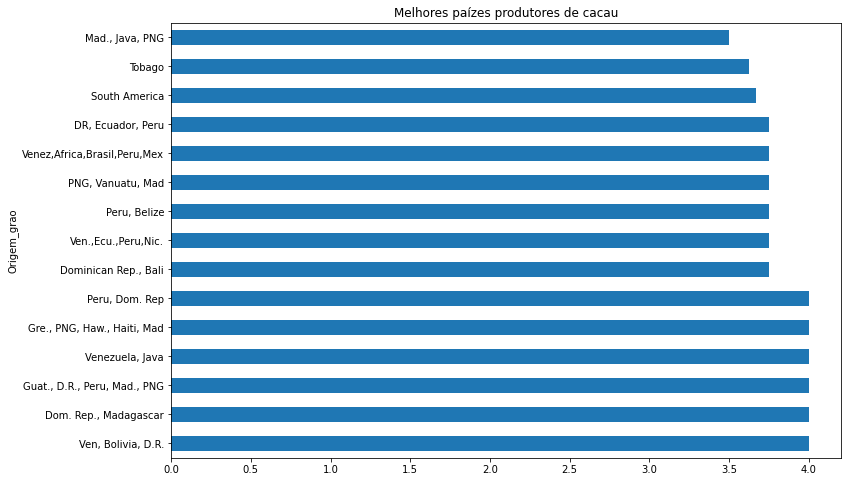

In [147]:
origem_grao.sort_values(ascending = False).round(3).head(15).plot(kind = 'barh', figsize = (12, 8), 
                                                                 title = 'Melhores paízes produtores de cacau');

In [191]:
top_15_origem_grao = origem_grao.sort_values(ascending = False).round(3).head(25)
lista_origem_grao = list(top_15_origem_grao.index)
dados.query('Origem_grao in @lista_origem_grao')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
106,Arete,"La Masica, FHIA",1908,2016,70%,U.S.A.,3.50,,Honduras
123,Artisan du Chocolat,Haiti,729,2011,72%,U.K.,4.00,,Haiti
136,Artisan du Chocolat,Congo,300,2008,72%,U.K.,3.75,Forastero,Congo
140,Askinosie,Cortes,661,2011,70%,U.S.A.,3.75,Trinitario,Honduras
197,Bittersweet Origins,2009 Hapa Nibby,502,2010,70%,U.S.A.,3.75,Blend,"Dominican Rep., Bali"
...,...,...,...,...,...,...,...,...,...
1663,Tobago Estate (Pralus),"Roxborough, Tobago",895,2012,70%,France,4.00,Trinitario,Tobago
1699,Valrhona,Guanaja,63,2006,70%,France,4.00,"Criollo, Trinitario",South America
1773,Zokoko,Guadalcanal,1716,2016,78%,Australia,3.75,,Solomon Islands
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo


In [192]:
origem_grao_melhores_notas = dados.query('Origem_grao in @lista_origem_grao')
origem_grao_melhores_notas.Fabricante.value_counts()

Soma                                9
Mast Brothers                       2
La Maison du Chocolat (Valrhona)    2
Solomons Gold                       2
Pierre Marcolini                    2
Mesocacao                           2
Artisan du Chocolat                 2
Zotter                              2
Bonnat                              2
Cacao Sampaka                       1
Naive                               1
Original Beans (Felchlin)           1
Palette de Bine                     1
Park 75                             1
Blanxart                            1
Pinellas                            1
Pralus                              1
Pump Street Bakery                  1
Raaka                               1
Rogue                               1
Sirene                              1
Bittersweet Origins                 1
Askinosie                           1
Theo                                1
Tobago Estate (Pralus)              1
Valrhona                            1
Zokoko      

In [194]:
origem_grao_melhores_notas.query('Fabricante == "Soma"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1510,Soma,"Abstract S. w/ Jamaica nibs,batch abs60323.0",1828,2016,75%,Canada,3.75,,"Ven.,Ecu.,Peru,Nic."
1528,Soma,Crazy 88,1077,2013,88%,Canada,4.00,,"Guat., D.R., Peru, Mad., PNG"
1530,Soma,Equator,1081,2013,67%,Canada,4.00,,"Peru, Dom. Rep"
1533,Soma,Noula Coop,817,2012,70%,Canada,3.25,,Haiti
1535,Soma,"Dual Origins, Sambirano, Elvesia",867,2012,70%,Canada,4.00,Blend,"Dom. Rep., Madagascar"
1536,Soma,"Dancing in Your Head, 5 bean blend",867,2012,70%,Canada,4.00,Blend,"Gre., PNG, Haw., Haiti, Mad"
1539,Soma,Eastern Promises,967,2012,70%,Canada,3.50,Blend,"Mad., Java, PNG"
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.00,NaN,"Ven, Bolivia, D.R."
1547,Soma,Black Science Blend 1,607,2010,70%,Canada,3.75,"Trinitario, Nacional","DR, Ecuador, Peru"


In [195]:
origem_grao_melhores_notas.Produto.value_counts()

Honduras                                        4
Haiti                                           3
Trinidad & Tobago                               2
South America                                   2
Pisa                                            2
Guadalcanal                                     2
Virunga                                         2
Congo                                           2
Three Amigos(Chuao, Wild Bolivia, D.R.)         1
La Masica, Batch 1, FHIA Research Center        1
Duo- Gran Couva & Camino Verde                  1
Guanaja                                         1
Cabosse                                         1
Fleur de Cacao                                  1
Roxborough, Tobago                              1
Wampusirpi Region                               1
Congo w/ nibs                                   1
Djakarta, Java and Ghana                        1
Solomon Island                                  1
Eastern Promises                                1


In [196]:
origem_grao_melhores_notas.query('Produto == "Honduras"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
869,Indi,Honduras,1255,2014,77%,U.S.A.,3.00,,Honduras
1104,Mesocacao,Honduras,1347,2014,80%,Honduras,3.25,,Honduras
1105,Mesocacao,Honduras,1347,2014,70%,Honduras,3.50,,Honduras
1342,Pump Street Bakery,Honduras,1688,2015,80%,U.K.,2.75,,Honduras


In [197]:
origem_grao_melhores_notas.Porcentagem_cacau.value_counts()

70%    25
75%     9
65%     6
72%     4
73%     3
80%     3
82%     2
68%     2
78%     2
64%     1
77%     1
60%     1
74%     1
85%     1
88%     1
67%     1
Name: Porcentagem_cacau, dtype: int64

In [198]:
origem_grao_melhores_notas.query('Porcentagem_cacau == "70%"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
106,Arete,"La Masica, FHIA",1908,2016,70%,U.S.A.,3.50,,Honduras
140,Askinosie,Cortes,661,2011,70%,U.S.A.,3.75,Trinitario,Honduras
197,Bittersweet Origins,2009 Hapa Nibby,502,2010,70%,U.S.A.,3.75,Blend,"Dominican Rep., Bali"
303,Cacao Market,"Jutiapa, lot 050916D",1860,2016,70%,U.S.A.,3.50,Trinitario,Honduras
308,Cacao Sampaka,"Mahali, Kasai",1908,2016,70%,Spain,3.50,Criollo,Congo
712,Friis Holm (Bonnat),"Red Mayan, Xoco",899,2012,70%,Denmark,3.25,"Criollo, Trinitario",Honduras
909,K'ul,"Kafupbo, Petit Bourg, De Borgnes",1840,2016,70%,U.S.A.,3.25,,Haiti
958,Letterpress,"La Masica, Batch 7, FHIA",1952,2017,70%,U.S.A.,3.50,,Honduras
1089,Matale,Blend,1181,2013,70%,Australia,3.75,Trinitario,"PNG, Vanuatu, Mad"
1105,Mesocacao,Honduras,1347,2014,70%,Honduras,3.50,,Honduras


In [209]:
origem_grao_melhores_notas.groupby('Local_empresa')['Origem_grao'].nunique().sort_values(ascending = False)

Local_empresa
Canada         10
U.S.A.          8
France          6
U.K.            3
Australia       2
Amsterdam       2
Belgium         2
Austria         2
Denmark         1
Honduras        1
Japan           1
Lithuania       1
New Zealand     1
Scotland        1
Spain           1
Switzerland     1
Italy           1
Name: Origem_grao, dtype: int64

In [208]:
origem_grao_melhores_notas.query('Local_empresa == "Canada"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
1262,Palette de Bine,Duo- Gran Couva & Camino Verde,1399,2014,75%,Canada,3.50,Blend,"Trinidad, Ecuador"
1470,Sirene,Pisa,1650,2015,73%,Canada,3.25,,Haiti
1510,Soma,"Abstract S. w/ Jamaica nibs,batch abs60323.0",1828,2016,75%,Canada,3.75,,"Ven.,Ecu.,Peru,Nic."
1528,Soma,Crazy 88,1077,2013,88%,Canada,4.00,,"Guat., D.R., Peru, Mad., PNG"
1530,Soma,Equator,1081,2013,67%,Canada,4.00,,"Peru, Dom. Rep"
1533,Soma,Noula Coop,817,2012,70%,Canada,3.25,,Haiti
1535,Soma,"Dual Origins, Sambirano, Elvesia",867,2012,70%,Canada,4.00,Blend,"Dom. Rep., Madagascar"
1536,Soma,"Dancing in Your Head, 5 bean blend",867,2012,70%,Canada,4.00,Blend,"Gre., PNG, Haw., Haiti, Mad"
1539,Soma,Eastern Promises,967,2012,70%,Canada,3.50,Blend,"Mad., Java, PNG"
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.00,NaN,"Ven, Bolivia, D.R."


In [210]:
origem_grao_melhores_notas.Tipo_grao.value_counts()

                        29
Blend                   10
Forastero                9
Trinitario               6
Criollo, Trinitario      3
Criollo                  2
Trinitario, Criollo      1
Criollo, Forastero       1
Trinitario, Nacional     1
Name: Tipo_grao, dtype: int64

In [211]:
origem_grao_melhores_notas.query('Tipo_grao == "Blend"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
197,Bittersweet Origins,2009 Hapa Nibby,502,2010,70%,U.S.A.,3.75,Blend,"Dominican Rep., Bali"
939,La Maison du Chocolat (Valrhona),"Cuana, 2008",230,2008,74%,France,3.50,Blend,"Ven., Indonesia, Ecuad."
1070,Mast Brothers,French Laundry 20th Anniversary,1359,2014,75%,U.S.A.,3.75,Blend,"Peru, Belize"
1071,Mast Brothers,Shake Shack,959,2012,73%,U.S.A.,3.50,Blend,"Peru, Mad., Dom. Rep."
1262,Palette de Bine,Duo- Gran Couva & Camino Verde,1399,2014,75%,Canada,3.50,Blend,"Trinidad, Ecuador"
1288,Pierre Marcolini,Cabosse,111,2007,70%,Belgium,4.00,Blend,"Venezuela, Java"
1291,Pierre Marcolini,Fleur de Cacao,166,2007,85%,Belgium,3.50,Blend,Venezuela/ Ghana
1535,Soma,"Dual Origins, Sambirano, Elvesia",867,2012,70%,Canada,4.00,Blend,"Dom. Rep., Madagascar"
1536,Soma,"Dancing in Your Head, 5 bean blend",867,2012,70%,Canada,4.00,Blend,"Gre., PNG, Haw., Haiti, Mad"
1539,Soma,Eastern Promises,967,2012,70%,Canada,3.50,Blend,"Mad., Java, PNG"


In [212]:
origem_grao_melhores_notas.Origem_grao.value_counts()

Honduras                        15
Congo                           10
Haiti                            9
Solomon Islands                  4
South America                    3
Trinidad, Tobago                 2
Tobago                           2
Ven, Bolivia, D.R.               1
Mad., Java, PNG                  1
Gre., PNG, Haw., Haiti, Mad      1
Dom. Rep., Madagascar            1
Peru, Dom. Rep                   1
Guat., D.R., Peru, Mad., PNG     1
Ven.,Ecu.,Peru,Nic.              1
Indonesia, Ghana                 1
Venezuela/ Ghana                 1
Venezuela, Java                  1
Trinidad, Ecuador                1
Dominican Rep., Bali             1
PNG, Vanuatu, Mad                1
Peru, Mad., Dom. Rep.            1
Peru, Belize                     1
Venez,Africa,Brasil,Peru,Mex     1
Ven., Indonesia, Ecuad.          1
DR, Ecuador, Peru                1
Name: Origem_grao, dtype: int64

In [213]:
origem_grao_melhores_notas.query('Origem_grao == "Honduras"')

,Fabricante,Produto,REF,Data_nota,Porcentagem_cacau,Local_empresa,Nota,Tipo_grao,Origem_grao
106,Arete,"La Masica, FHIA",1908,2016,70%,U.S.A.,3.50,,Honduras
140,Askinosie,Cortes,661,2011,70%,U.S.A.,3.75,Trinitario,Honduras
303,Cacao Market,"Jutiapa, lot 050916D",1860,2016,70%,U.S.A.,3.50,Trinitario,Honduras
358,Castronovo,"the lost city, gracias a dias, batch 362",1570,2015,72%,U.S.A.,3.50,Trinitario,Honduras
585,Duffy's,"Indio Rojo, Xoco",623,2011,72%,U.K.,3.75,Criollo,Honduras
621,ENNA,"Wampusirpi, batch 007",1916,2016,75%,U.S.A.,3.25,,Honduras
712,Friis Holm (Bonnat),"Red Mayan, Xoco",899,2012,70%,Denmark,3.25,"Criollo, Trinitario",Honduras
869,Indi,Honduras,1255,2014,77%,U.S.A.,3.00,,Honduras
958,Letterpress,"La Masica, Batch 7, FHIA",1952,2017,70%,U.S.A.,3.50,,Honduras
1044,Map Chocolate,Le Chocolat Chaud,1634,2015,78%,U.S.A.,3.50,,Honduras


## Dados e estatística:

In [162]:
dados.Origem_grao.value_counts()

Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Trinidad, Ecuador          1
Venezuela, Carribean       1
Name: Origem_grao, Length: 100, dtype: int64

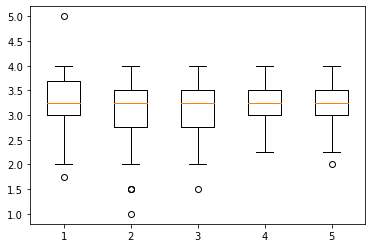

In [163]:
produto_venezuela = dados.query('Origem_grao == "Venezuela"')
produto_ecuador = dados.query('Origem_grao == "Ecuador"')
produto_peru = dados.query('Origem_grao == "Peru"')
produto_madagascar = dados.query('Origem_grao == "Madagascar"')
produto_dominican = dados.query('Origem_grao == "Dominican Republic"')
plt.boxplot([produto_venezuela.Nota, produto_ecuador.Nota, produto_peru.Nota, produto_madagascar.Nota, produto_dominican.Nota]);

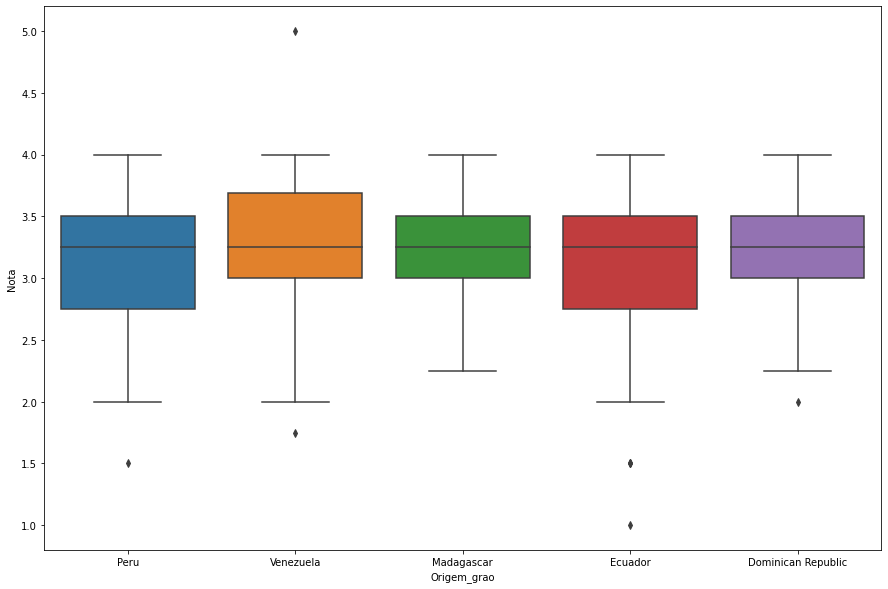

In [164]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Origem_grao', y = 'Nota', data = dados.query('Origem_grao == ("Venezuela", "Ecuador", "Peru", "Madagascar", "Dominican Republic")'));

In [166]:
print('Desvio padrão dos grãos da Venezuela = %.2f' % produto_venezuela.Nota.std(), 
      '\nDesvio padrão dos grãos do Equador = %.2f' % produto_ecuador.Nota.std(), 
      '\nDesvio padrão dos grãos do Peru = %.2f' % produto_peru.Nota.std(),
      '\nDesvio padrão dos grãos de Madagascar = %.2f' % produto_madagascar.Nota.std(),
      '\nDesvio padrão dos grãos da República Dominicana = %.2f' % produto_dominican.Nota.std())

Desvio padrão dos grãos da Venezuela = 0.50 
Desvio padrão dos grãos do Equador = 0.53 
Desvio padrão dos grãos do Peru = 0.50 
Desvio padrão dos grãos de Madagascar = 0.41 
Desvio padrão dos grãos da República Dominicana = 0.41


#### Conclusão:

Ao fazer uma contagem de valor da Origem dos grãos, a *Venezuela* aparece em primeiro lugar, seguida por *Equador*, *Peru*, *Madagascar* e *República Dominicana* fechando o top 5 maiores exportadores. Cenário bem diferente do que foi analisado anteriormente, portanto decidi fazer uma análise estatística desses países, já que eles apresentam diversos registros, possibilitando um maior detalhamento destes fornecedores.  

Ao plotar o boxplot, observa-se que todos possuem a mesma mediana, 3,5. E com exceção de *Madagascar*, todos os países apresentaram outliers menores do que 2,0. 

Ao calcular o desvio padrão, observa-se que os grãos provenientes da *República Dominicana* e *Madagascar* receberam notas mais próximas do que os demais países, apresentando um perfil de matéria prima mais consistente.
